In [1]:
import pandas as pd
import pylab as pl
import seaborn as sn
import numpy as np
import zipfile
import geopandas as gp
import statsmodels as st
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
iden = pd.read_csv("Identificacion.csv", ";")

In [3]:
len(iden.COD_UPZ.unique())

91

In [4]:
iden.head()

DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN             NVCAP99  DPTOMPIO  \
0      101000          1            1      1  03SEP2017:00:00:00     11001   
1      101001          1            1      1  03SEP2017:00:00:00     11001   
2      101002          1            1      1  03SEP2017:00:00:00     11001   
3      101003          1            1      1  03SEP2017:00:00:00     11001   
4      101004          1            1      1  03SEP2017:00:00:00     11001   

   CLASE  TOT_HOG_COMP         FEX_C LOCALIDAD_TEX COD_UPZ CODLOCALIDAD  
0      1             1  16,604442041          SUBA      23           11  
1      1             1  26,046357048       USAQUEN      11            1  
2      1             1  13,840826089       USAQUEN      12            1  
3      1             1  7,0111108805       USAQUEN      12            1  
4      1             1  67,930390356       USAQUEN     803            1

In [5]:
iden.tail()

DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN             NVCAP99  \
107213      317844          1            1      1  02MAR2018:00:00:00   
107214      317859          1            1      1  02MAR2018:00:00:00   
107215      317874          1            1      1  02MAR2018:00:00:00   
107216      317881          1            1      1  02MAR2018:00:00:00   
107217      317885          1            1      1  02MAR2018:00:00:00   

        DPTOMPIO  CLASE  TOT_HOG_COMP FEX_C LOCALIDAD_TEX COD_UPZ CODLOCALIDAD  
107213     11001      3             1     1          USME                    5  
107214     11001      3             1     1          USME                    5  
107215     11001      3             1     1          USME                    5  
107216     11001      3             1     1          USME                    5  
107217     11001      3             1     1          USME                    5

In [6]:
raros = iden[iden.FEX_C == "1"]

In [7]:
raros.shape

(7409, 12)

In [8]:
raros.LOCALIDAD_TEX.unique()

array(['SUBA', 'OTRA LOCALIDAD RURAL', 'CIUDAD BOLIVAR', 'USME', ' ',
       'SUMAPAZ'], dtype=object)

In [9]:
iden = iden[iden["LOCALIDAD_TEX"] != "OTRA LOCALIDAD RURAL"]
iden = iden[iden["LOCALIDAD_TEX"] != "SUMAPAZ"]
iden = iden[iden["LOCALIDAD_TEX"] != " "]

In [10]:
iden.shape

(75034, 12)

In [11]:
raros.groupby(raros["LOCALIDAD_TEX"]).count()

DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN  NVCAP99  \
LOCALIDAD_TEX                                                              
                            5089       5089         5089   5089     5089   
CIUDAD BOLIVAR               368        368          368    368      368   
OTRA LOCALIDAD RURAL         295        295          295    295      295   
SUBA                         476        476          476    476      476   
SUMAPAZ                      368        368          368    368      368   
USME                         813        813          813    813      813   

                      DPTOMPIO  CLASE  TOT_HOG_COMP  FEX_C  COD_UPZ  \
LOCALIDAD_TEX                                                         
                          5089   5089          5089   5089     5089   
CIUDAD BOLIVAR             368    368           368    368      368   
OTRA LOCALIDAD RURAL       295    295           295    295      295   
SUBA                       476    476           476    476      476   
SUMAPAZ                    368    368           368    368      368   
USME                       813    813           813    813      813   

                      CODLOCALIDAD  
LOCALIDAD_TEX                       
                              5089  
CIUDAD BOLIVAR                 368  
OTRA LOCALIDAD RURAL           295  
SUBA                           476  
SUMAPAZ                        368  
USME                           813

In [12]:
print (type(iden.COD_UPZ.iloc[1]))
print (type(iden.FEX_C.iloc[1]))

<class 'str'>
<class 'str'>


In [13]:
arreglo = iden.stack().str.replace(',','.').unstack()

In [14]:
arreglo.head()

DIRECTORIO SECUENCIA SECUENCIA_P ORDEN             NVCAP99 DPTOMPIO CLASE  \
0        NaN       NaN         NaN   NaN  03SEP2017:00:00:00      NaN   NaN   
1        NaN       NaN         NaN   NaN  03SEP2017:00:00:00      NaN   NaN   
2        NaN       NaN         NaN   NaN  03SEP2017:00:00:00      NaN   NaN   
3        NaN       NaN         NaN   NaN  03SEP2017:00:00:00      NaN   NaN   
4        NaN       NaN         NaN   NaN  03SEP2017:00:00:00      NaN   NaN   

  TOT_HOG_COMP         FEX_C LOCALIDAD_TEX COD_UPZ CODLOCALIDAD  
0          NaN  16.604442041          SUBA      23           11  
1          NaN  26.046357048       USAQUEN      11            1  
2          NaN  13.840826089       USAQUEN      12            1  
3          NaN  7.0111108805       USAQUEN      12            1  
4          NaN  67.930390356       USAQUEN     803            1

In [15]:
arreglo["FEX_C"] = arreglo["FEX_C"].astype(float)

In [16]:
iden["FEX_C"] = arreglo["FEX_C"]

In [17]:
iden.head()

DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN             NVCAP99  DPTOMPIO  \
0      101000          1            1      1  03SEP2017:00:00:00     11001   
1      101001          1            1      1  03SEP2017:00:00:00     11001   
2      101002          1            1      1  03SEP2017:00:00:00     11001   
3      101003          1            1      1  03SEP2017:00:00:00     11001   
4      101004          1            1      1  03SEP2017:00:00:00     11001   

   CLASE  TOT_HOG_COMP      FEX_C LOCALIDAD_TEX COD_UPZ CODLOCALIDAD  
0      1             1  16.604442          SUBA      23           11  
1      1             1  26.046357       USAQUEN      11            1  
2      1             1  13.840826       USAQUEN      12            1  
3      1             1   7.011111       USAQUEN      12            1  
4      1             1  67.930390       USAQUEN     803            1

In [18]:
iden.shape

(75034, 12)

In [19]:
pop_upz = iden.groupby(iden["COD_UPZ"]).sum().reset_index()

In [20]:
pop_upz.describe()

DIRECTORIO    SECUENCIA  SECUENCIA_P        ORDEN      DPTOMPIO  \
count  9.100000e+01    91.000000    91.000000    91.000000  9.100000e+01   
mean   1.651516e+08   824.549451   824.549451   824.549451  9.070869e+06   
std    3.404403e+07   159.819291   159.819291   159.819291  1.758172e+06   
min    1.151727e+08   520.000000   520.000000   520.000000  5.720520e+06   
25%    1.444292e+08   724.000000   724.000000   724.000000  7.964724e+06   
50%    1.621951e+08   814.000000   814.000000   814.000000  8.954814e+06   
75%    1.802524e+08   920.500000   920.500000   920.500000  1.012642e+07   
max    3.833493e+08  1657.000000  1657.000000  1657.000000  1.822866e+07   

             CLASE  TOT_HOG_COMP          FEX_C  
count    91.000000     91.000000      91.000000  
mean    859.340659    838.989011   29136.201730  
std     440.747880    158.881192   20362.253632  
min     520.000000    521.000000    1657.000000  
25%     724.000000    750.500000   14873.312997  
50%     814.000000    831.000000   23842.852682  
75%     920.500000    928.500000   40640.314683  
max    4823.000000   1708.000000  122230.698172

In [21]:
len(iden["COD_UPZ"].unique())

91

In [22]:
#zip_ref = zipfile.ZipFile("upz.zip", 'r')
#zip_ref.extractall()
#zip_ref.close()

In [23]:
upz = gp.GeoDataFrame.from_file("upz.shp")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

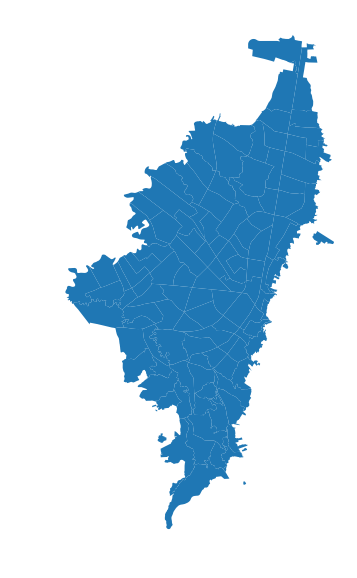

In [24]:
ax = upz.plot(figsize=(10,10))
plt.axis("off")

In [25]:
upz.columns

Index(['NUMERO', 'NOMBRE', 'CLASIFICAC', 'TIPO_UPZ', 'DESC_TIPO', 'NLOCALIDAD',
       'LOCALIDAD', 'ESTRATOS', 'COD_ESTRAT', 'AREA', 'PERIMETER', 'HECTARES',
       'geometry'],
      dtype='object')

In [26]:
upz["NUMERO"] = upz["NUMERO"].astype(str)

In [27]:
iden.columns

Index(['DIRECTORIO', 'SECUENCIA', 'SECUENCIA_P', 'ORDEN', 'NVCAP99',
       'DPTOMPIO', 'CLASE', 'TOT_HOG_COMP', 'FEX_C', 'LOCALIDAD_TEX',
       'COD_UPZ', 'CODLOCALIDAD'],
      dtype='object')

In [28]:
df = pd.merge(iden, upz, left_on="COD_UPZ", right_on="NUMERO", how = "right")

In [29]:
df.head()

DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN             NVCAP99  DPTOMPIO  \
0    101000.0        1.0          1.0    1.0  03SEP2017:00:00:00   11001.0   
1    101020.0        1.0          1.0    1.0  09SEP2017:00:00:00   11001.0   
2    101022.0        1.0          1.0    1.0  09SEP2017:00:00:00   11001.0   
3    101023.0        1.0          1.0    1.0  09SEP2017:00:00:00   11001.0   
4    101024.0        1.0          1.0    1.0  10SEP2017:00:00:00   11001.0   

   CLASE  TOT_HOG_COMP      FEX_C LOCALIDAD_TEX  \
0    1.0           1.0  16.604442          SUBA   
1    1.0           1.0  19.107988          SUBA   
2    1.0           1.0  20.413564          SUBA   
3    1.0           1.0  21.122395          SUBA   
4    1.0           1.0  16.604442          SUBA   

                         ...                         TIPO_UPZ   DESC_TIPO  \
0                        ...                                4  DESARROLLO   
1                        ...                                4  DESARROLLO   
2                        ...                                4  DESARROLLO   
3                        ...                                4  DESARROLLO   
4                        ...                                4  DESARROLLO   

  NLOCALIDAD LOCALIDAD         ESTRATOS  COD_ESTRAT         AREA  PERIMETER  \
0         11      SUBA  ESTRATOS VARIOS       23456  4199189.396  10340.523   
1         11      SUBA  ESTRATOS VARIOS       23456  4199189.396  10340.523   
2         11      SUBA  ESTRATOS VARIOS       23456  4199189.396  10340.523   
3         11      SUBA  ESTRATOS VARIOS       23456  4199189.396  10340.523   
4         11      SUBA  ESTRATOS VARIOS       23456  4199189.396  10340.523   

  HECTARES                                           geometry  
0  419.919  POLYGON ((101301.968398328 118170.407855043, 1...  
1  419.919  POLYGON ((101301.968398328 118170.407855043, 1...  
2  419.919  POLYGON ((101301.968398328 118170.407855043, 1...  
3  419.919  POLYGON ((101301.968398328 118170.407855043, 1...  
4  419.919  POLYGON ((101301.968398328 118170.407855043, 1...  

[5 rows x 25 columns]

In [30]:
data = gp.GeoDataFrame(df)

In [31]:
pop_upz.columns

Index(['COD_UPZ', 'DIRECTORIO', 'SECUENCIA', 'SECUENCIA_P', 'ORDEN',
       'DPTOMPIO', 'CLASE', 'TOT_HOG_COMP', 'FEX_C'],
      dtype='object')

In [32]:
poblacion = pd.merge(pop_upz, upz, left_on="COD_UPZ", right_on="NUMERO")

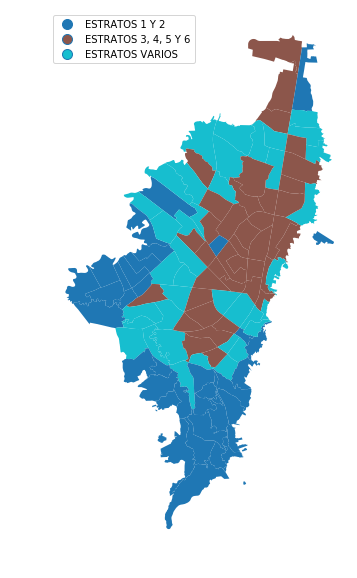

In [33]:
ax = upz.plot(figsize=(10,10), column="ESTRATOS",legend=True)
plt.axis("off")

leg = ax.get_legend()
leg.set_bbox_to_anchor((0.3, 0.8, 0.2, 0.2))

In [34]:
pop_upz.COD_UPZ.unique()

array([' ', '100', '101', '102', '107', '109', '11', '110', '112', '114',
       '12', '13', '18', '19', '21', '23', '24', '26', '27', '28', '29',
       '30', '32', '33', '34', '35', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '47', '48', '49', '50', '51', '52', '54', '55',
       '57', '58', '62', '65', '66', '67', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '80', '801', '802', '803',
       '804', '805', '806', '807', '808', '809', '81', '810', '811',
       '812', '813', '814', '815', '816', '817', '82', '83', '84', '85',
       '86', '87', '89', '92', '94', '95', '96', '98'], dtype=object)

In [35]:
pop_upz.COD_UPZ.unique()

array([' ', '100', '101', '102', '107', '109', '11', '110', '112', '114',
       '12', '13', '18', '19', '21', '23', '24', '26', '27', '28', '29',
       '30', '32', '33', '34', '35', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '47', '48', '49', '50', '51', '52', '54', '55',
       '57', '58', '62', '65', '66', '67', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '80', '801', '802', '803',
       '804', '805', '806', '807', '808', '809', '81', '810', '811',
       '812', '813', '814', '815', '816', '817', '82', '83', '84', '85',
       '86', '87', '89', '92', '94', '95', '96', '98'], dtype=object)

In [36]:
upz.NUMERO.unique()

array(['117', '76', '77', '115', '75', '114', '112', '110', '78', '46',
       '79', '82', '83', '113', '80', '47', '44', '81', '45', '48', '86',
       '87', '84', '85', '49', '42', '62', '56', '57', '58', '59', '61',
       '33', '34', '32', '50', '51', '91', '92', '93', '96', '95', '97',
       '88', '89', '99', '90', '65', '69', '70', '66', '67', '63', '39',
       '36', '53', '54', '55', '94', '111', '43', '108', '40', '41', '38',
       '35', '102', '37', '104', '106', '109', '100', '107', '101', '21',
       '22', '98', '103', '3', '2', '17', '27', '71', '23', '18', '28',
       '19', '24', '25', '20', '72', '73', '74', '29', '30', '116', '26',
       '31', '105', '1', '9', '10', '12', '11', '13', '15', '14', '16',
       '64', '68', '52', '60'], dtype=object)

In [37]:
upz.NOMBRE.unique()

array(['AEROPUERTO EL DORADO', 'FONTIBON SAN PABLO', 'ZONA FRANCA',
       'CAPELLANIA', 'FONTIBON', 'MODELIA', 'GRANJAS DE TECHO',
       'CIUDAD SALITRE OCCIDENTAL', 'TINTAL NORTE', 'CASTILLA',
       'CALANDAIMA', 'PATIO BONITO', 'LAS MARGARITAS', 'BAVARIA',
       'CORABASTOS', 'KENNEDY CENTRAL', 'AMERICAS', 'GRAN BRITALIA',
       'CARVAJAL', 'TIMIZA', 'EL PORVENIR', 'TINTAL SUR',
       'BOSA OCCIDENTAL', 'BOSA CENTRAL', 'APOGEO', 'VENECIA',
       'TUNJUELITO', 'DANUBIO', 'GRAN YOMASA', 'COMUNEROS',
       'ALFONSO LOPEZ', 'CIUDAD USME', 'SOSIEGO', '20 DE JULIO',
       'SAN BLAS', 'LA GLORIA', 'LOS LIBERTADORES', 'SAGRADO CORAZON',
       'LA MACARENA', 'LAS NIEVES', 'LOURDES', 'LAS CRUCES', 'CHICO LAGO',
       'EL REFUGIO', 'SAN ISIDRO-PATIOS', 'CHAPINERO', 'PARDO RUBIO',
       'ARBORIZADORA', 'ISMAEL PERDOMO', 'JERUSALEM', 'SAN FRANCISCO',
       'LUCERO', 'EL MOCHUELO', 'QUIROGA', 'SAN JOSE',
       'MARCO FIDEL SUAREZ', 'MARRUECOS', 'DIANA TURBAY', 'LA CANDELARIA',
      

In [38]:
grupo1_1 = upz[upz.NOMBRE == "MARCO FIDEL SUAREZ"]
grupo1_2 = upz[upz.NOMBRE == "SAN JOSE"]


grupo2_1 = upz[upz.NOMBRE == "CASTILLA"]
grupo2_2 = upz[upz.NOMBRE == "BAVARIA"]

grupo3_1 = upz[upz.NOMBRE == "COUNTRY CLUB"]
grupo3_2 = upz[upz.NOMBRE == "SANTA BARBARA"]

grupo4_1 = upz[upz.NOMBRE == "VERBENAL"]
grupo4_2 = upz[upz.NOMBRE == "PASEO DE LOS LIBERTADORES"]
grupo4_3 = upz[upz.NOMBRE == "LA URIBE"]

grupo5_1 = upz[upz.NOMBRE == "LA FLORESTA"]
grupo5_2 = upz[upz.NOMBRE == "LA ALHAMBRA"]

grupo6_1 = upz[upz.NOMBRE == "LA ACADEMIA"]
grupo6_2 = upz[upz.NOMBRE == "GUAYMARAL"]
grupo6_3 = upz[upz.NOMBRE == "SAN JOSE DE BAVARIA"]

grupo7_1 = upz[upz.NOMBRE == "PARQUE EL SALITRE"]
grupo7_2 = upz[upz.NOMBRE == "DOCE DE OCTUBRE"]

grupo8_1 = upz[upz.NOMBRE == "PARQUE SIMON BOLIVAR-CAN"]
grupo8_2 = upz[upz.NOMBRE == "LA ESMERALDA"]

grupo9_1 = upz[upz.NOMBRE == "ZONA INDUSTRIAL"]
grupo9_2 = upz[upz.NOMBRE == "PUENTE ARANDA"]

grupo10_1 = upz[upz.NOMBRE == "SANTA CECILIA"]
grupo10_2 = upz[upz.NOMBRE == "ALAMOS"]
grupo10_3 = upz[upz.NOMBRE == "JARDIN BOTANICO"]

grupo11_1 = upz[upz.NOMBRE == "ALFONSO LOPEZ"]
grupo11_2 = upz[upz.NOMBRE == "CIUDAD USME"]

grupo12_1 = upz[upz.NOMBRE == "PARQUE ENTRENUBES"]
grupo12_2 = upz[upz.NOMBRE == "DANUBIO"]

grupo13_1 = upz[upz.NOMBRE == "AEROPUERTO EL DORADO"]
grupo13_2 = upz[upz.NOMBRE == "CAPELLANIA"]

grupo14_1 = upz[upz.NOMBRE == "LAS NIEVES"]
grupo14_2 = upz[upz.NOMBRE == "SAGRADO CORAZON"]

grupo15_1 = upz[upz.NOMBRE == "MONTE BLANCO"]
grupo15_2 = upz[upz.NOMBRE == "EL TESORO"]
grupo15_3 = upz[upz.NOMBRE == "EL MOCHUELO"]

grupo16_1 = upz[upz.NOMBRE == "PARDO RUBIO"]
grupo16_2 = upz[upz.NOMBRE == "CHAPINERO"]

grupo17_1 = upz[upz.NOMBRE == "CHICO LAGO"]
grupo17_2 = upz[upz.NOMBRE == "EL REFUGIO"]



In [39]:
grupo17_2

NUMERO      NOMBRE CLASIFICAC  TIPO_UPZ                DESC_TIPO  \
43     88  EL REFUGIO          c         3  RESIDENCIAL CUALIFICADO   

    NLOCALIDAD  LOCALIDAD              ESTRATOS  COD_ESTRAT         AREA  \
43           2  CHAPINERO  ESTRATOS 3, 4, 5 Y 6          56  3360634.089   

    PERIMETER  HECTARES                                           geometry  
43  13276.697   336.063  POLYGON ((104633.468205416 109095.724383029, 1...

In [40]:
upz.loc[55, 'NUMERO'] = '801'
upz.loc[54, 'NUMERO'] = '801'

upz.loc[9, 'NUMERO'] = '802'
upz.loc[13, 'NUMERO'] = '802'

upz.loc[105, 'NUMERO'] = '803'
upz.loc[107, 'NUMERO'] = '803'

upz.loc[100, 'NUMERO'] = '804'
upz.loc[99, 'NUMERO'] = '804'
upz.loc[101, 'NUMERO'] = '804'

upz.loc[88, 'NUMERO'] = '805'
upz.loc[89, 'NUMERO'] = '805'

upz.loc[79, 'NUMERO'] = '806'
upz.loc[78, 'NUMERO'] = '806'
upz.loc[80, 'NUMERO'] = '806'

upz.loc[103, 'NUMERO'] = '807'
upz.loc[75, 'NUMERO'] = '807'

upz.loc[68, 'NUMERO'] = '808'
upz.loc[69, 'NUMERO'] = '808'

upz.loc[61, 'NUMERO'] = '809'
upz.loc[59, 'NUMERO'] = '809'

upz.loc[97, 'NUMERO'] = '810'
upz.loc[95, 'NUMERO'] = '810'
upz.loc[98, 'NUMERO'] = '810'

upz.loc[30, 'NUMERO'] = '811'
upz.loc[31, 'NUMERO'] = '811'

upz.loc[111, 'NUMERO'] = '812'
upz.loc[27, 'NUMERO'] = '812'

upz.loc[0, 'NUMERO'] = '813'
upz.loc[3, 'NUMERO'] = '813'

upz.loc[39, 'NUMERO'] = '814'
upz.loc[37, 'NUMERO'] = '814'

upz.loc[108, 'NUMERO'] = '815'
upz.loc[109, 'NUMERO'] = '815'
upz.loc[52, 'NUMERO'] = '815'

upz.loc[46, 'NUMERO'] = '816'
upz.loc[45, 'NUMERO'] = '816'

upz.loc[42, 'NUMERO'] = '817'
upz.loc[43, 'NUMERO'] = '817'


In [41]:
len(df.NUMERO.unique())

112

In [42]:
df = pd.merge(iden, upz, left_on="COD_UPZ", right_on="NUMERO", how = "right")

In [43]:
len(df.NUMERO.unique())

91

In [44]:
upz.NUMERO.unique()

array(['813', '76', '77', '75', '114', '112', '110', '78', '802', '79',
       '82', '83', '80', '47', '44', '81', '45', '48', '86', '87', '84',
       '85', '49', '42', '62', '812', '57', '58', '811', '33', '34', '32',
       '50', '51', '814', '92', '96', '95', '817', '89', '816', '65',
       '69', '70', '66', '67', '815', '39', '801', '54', '55', '94',
       '809', '43', '40', '41', '38', '35', '102', '37', '808', '109',
       '100', '107', '101', '21', '807', '98', '103', '806', '27', '71',
       '23', '18', '28', '19', '24', '805', '72', '73', '74', '29', '30',
       '810', '26', '804', '12', '13', '803', '14', '52'], dtype=object)

In [45]:
len(upz.NUMERO.unique())

91

In [46]:
poblacion = pd.merge(pop_upz, upz, left_on="COD_UPZ", right_on="NUMERO")

In [47]:
pob = gp.GeoDataFrame(poblacion)

C:\Users\user\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

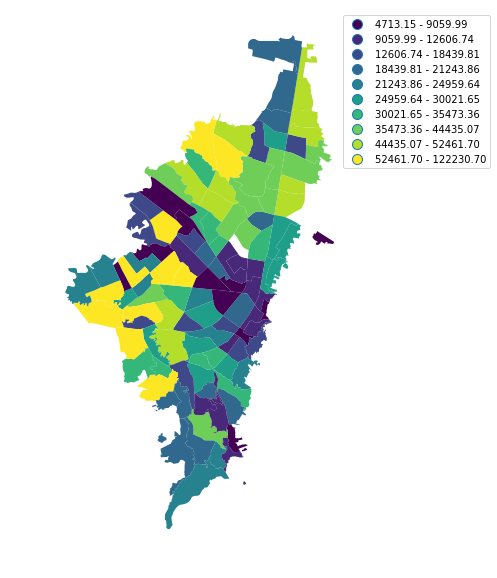

In [48]:
ax2 =pob.plot(figsize=(10,10), column="FEX_C",legend=True, 
         cmap="viridis", scheme = "quantiles", k = 10)

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.3, 0.8, 0.2, 0.2))

plt.axis("off")

In [49]:
pob.shape

(110, 22)

In [50]:
pob.head()

COD_UPZ  DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN  DPTOMPIO  CLASE  \
0     100   196043285        932          932    932  10252932    932   
1     101   200416403       1118         1118   1118  12299118   1118   
2     102   185811368        850          850    850   9350850    850   
3     107   171471857        845          845    845   9295845    845   
4     109   164007186        817          817    817   8987817    817   

   TOT_HOG_COMP         FEX_C NUMERO  \
0           938  10837.651090    100   
1          1136   9231.153210    101   
2           863  19497.502975    102   
3           848   8413.563638    107   
4           820  18536.902791    109   

                         ...                         TIPO_UPZ  \
0                        ...                                2   
1                        ...                                2   
2                        ...                                6   
3                        ...                                3   
4                        ...                                3   

                 DESC_TIPO  NLOCALIDAD     LOCALIDAD              ESTRATOS  \
0  RESIDENCIAL CONSOLIDADO          13   TEUSAQUILLO  ESTRATOS 3, 4, 5 Y 6   
1  RESIDENCIAL CONSOLIDADO          13   TEUSAQUILLO  ESTRATOS 3, 4, 5 Y 6   
2              COMERCIALES          14  LOS MARTIRES       ESTRATOS VARIOS   
3  RESIDENCIAL CUALIFICADO          13   TEUSAQUILLO  ESTRATOS 3, 4, 5 Y 6   
4  RESIDENCIAL CUALIFICADO          13   TEUSAQUILLO  ESTRATOS 3, 4, 5 Y 6   

  COD_ESTRAT         AREA  PERIMETER  HECTARES  \
0         34  2379206.716   6715.748   237.921   
1         34  2375422.510   7100.016   237.542   
2        234  4537811.694   8520.969   453.781   
3         34  1752520.196   6642.004   175.252   
4         45  1804795.995   6418.199   180.480   

                                            geometry  
0  POLYGON ((101430.497024482 105910.062520418, 1...  
1  POLYGON ((99772.17412917491 104246.354703924, ...  
2  POLYGON ((99379.71929260989 103141.190016865, ...  
3  POLYGON ((97411.8526340152 104345.082156811, 9...  
4  POLYGON ((96352.8573047426 105412.650593966, 9...  

[5 rows x 22 columns]

In [51]:
pob["densidad"] = pob["FEX_C"] / pob["HECTARES"]

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

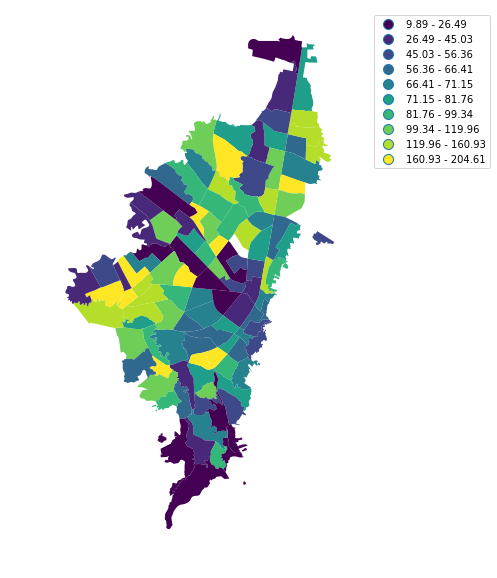

In [52]:
ax1 = pob.plot(figsize=(10,10), column="densidad",legend=True, 
         cmap="viridis", scheme = "quantiles", k = 10)


leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.3, 0.8, 0.2, 0.2))

plt.axis("off")

In [53]:
pob.FEX_C.sum()

3207673.2859623265

# Hasta acá tenemos una base de datos por UPZ que nos permite ver número de viviendas.

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

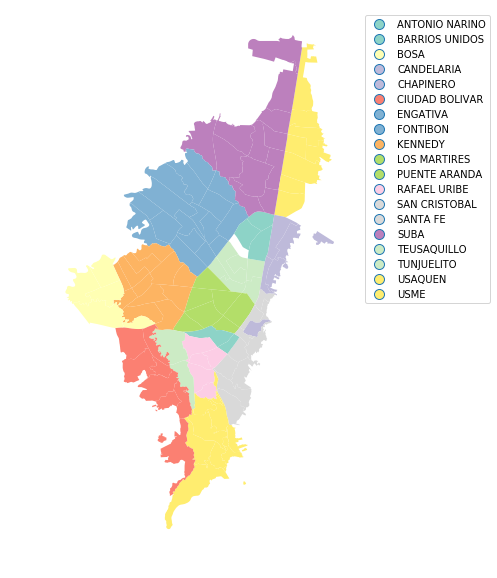

In [54]:
ax = pob.plot(figsize=(10,10), column="LOCALIDAD",legend=True, 
         cmap="Set3")
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3, 0.8, 0.2, 0.2))
plt.axis("off")

# Vamos a intentar meterle el tema de las zonas de renovación urbana

In [55]:
renov = gp.GeoDataFrame.from_file("Renovación_UPZ.shp")
renov_pot = gp.GeoDataFrame.from_file("Renovación_POT.shp")

In [56]:
renov.head()

CODIGO_UPZ CODIGO_TRA CODIGO_ACT  CODIGO_ZON ACTO_ADMIN NUMERO_ACT  \
0          94          4          5         501        DEC        492   
1         107          4          4         405        DEC        086   
2         107          4          3         302        DEC        086   
3         107          4          1         102        DEC        086   
4         107          4          1         102        DEC        086   

   FECHA_ACTO RESPONSABL   SHAPE_Leng     SHAPE_Area  \
0  2007-10-26        564  3640.128451  144900.555524   
1  2011-03-08        564   734.445718   30004.024640   
2  2011-03-08        564  1232.329978   91427.169807   
3  2011-03-08        564  5633.954188  228344.246792   
4  2011-03-08        564  1072.018207   36405.849003   

                                            geometry  
0  POLYGON ((99784.38549999986 99906.23379999958,...  
1  POLYGON ((98503.14659999963 103270.5615999997,...  
2  POLYGON ((98475.30759999994 103568.5962000005,...  
3  POLYGON ((98461.46750000026 104320.4053000007,...  
4  POLYGON ((99766.65359999985 104096.3570000008,...

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

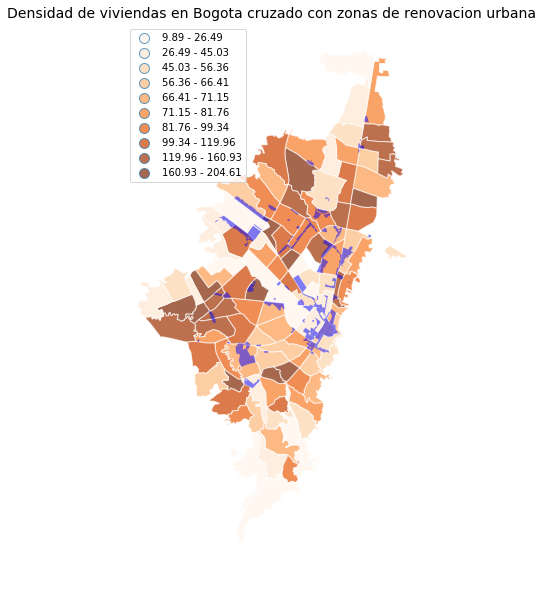

In [57]:
base = pob.plot( figsize=(10,10),column='densidad',cmap='Oranges',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.23, 0.8, 0.2, 0.2))

plt.title("Densidad de viviendas en Bogota cruzado con zonas de renovacion urbana", fontsize = 14)
plt.axis("off")

# Empecemos a mirar capítulo B. Particularmente preguntas 6, 10 y 15. Número de pisos, tipo de vivienda y principales problemas respectivamente


In [58]:
cap_b = pd.read_csv("Capitulo B.csv", ";")

In [59]:
cap_b.head(10)

DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN  NVCBP1 NVCBP2  NVCBP3  NVCBP4  \
0      101000          1            1      1       4      1       1       2   
1      101001          1            1      1       2      2       1       2   
2      101002          1            1      1       2      2       1       2   
3      101003          1            1      1       2      3       1       2   
4      101004          1            1      1       4      1       1       1   
5      101005          1            1      1       4      1       1       1   
6      101006          1            1      1       4      1       1       1   
7      101007          1            1      1       4      1       1       1   
8      101008          1            1      1       2      2       1       2   
9      101009          1            1      1       4      2       1       2   

   NVCBP5  NVCBP6      ...      NVCBP14K  NVCBP15A  NVCBP15B  NVCBP15C  \
0       1       3      ...             2         1         2         1   
1       1       3      ...             2         2         2         2   
2       1       2      ...             2         2         2         1   
3       2       3      ...             2         2         2         1   
4       1       3      ...             2         2         2         2   
5       2      12      ...             2         1         2         2   
6       1       3      ...             1         1         2         2   
7       1       3      ...             1         1         2         1   
8       1       1      ...             1         2         2         1   
9       2       2      ...             2         2         2         1   

   NVCBP15D  NVCBP15E  NVCBP15F  NVCBP15G  NVCBP15H         FEX_C  
0         2         1         2         2         2  16,604442041  
1         2         2         2         2         1  26,046357048  
2         2         2         2         2         2  13,840826089  
3         1         2         2         1         1  7,0111108805  
4         2         2         2         2         2  67,930390356  
5         1         2         2         2         2  33,398706249  
6         1         1         2         2         1  71,257845114  
7         1         2         2         2         1  43,007830454  
8         2         2         1         2         1   52,66534313  
9         2         2         2         2         2  23,328543674  

[10 rows x 51 columns]

In [60]:
cap_b.columns

Index(['DIRECTORIO', 'SECUENCIA', 'SECUENCIA_P', 'ORDEN', 'NVCBP1', 'NVCBP2',
       'NVCBP3', 'NVCBP4', 'NVCBP5', 'NVCBP6', 'NVCBP7', 'NVCBP8A', 'NVCBP8B',
       'NVCBP8C', 'NVCBP8D', 'NVCBP8E', 'NVCBP8F', 'NVCBP8G', 'NVCBP8H',
       'NVCBP8I', 'NVCBP8J', 'NVCBP9', 'NVCBP10', 'NVCBP11A', 'NVCBP11AA',
       'NVCBP11B', 'NVCBP11C', 'NVCBP11D', 'NVCBP11DA', 'NVCBP12', 'NVCBP13',
       'NVCBP14A', 'NVCBP14B', 'NVCBP14C', 'NVCBP14D', 'NVCBP14E', 'NVCBP14F',
       'NVCBP14G', 'NVCBP14H', 'NVCBP14I', 'NVCBP14J', 'NVCBP14K', 'NVCBP15A',
       'NVCBP15B', 'NVCBP15C', 'NVCBP15D', 'NVCBP15E', 'NVCBP15F', 'NVCBP15G',
       'NVCBP15H', 'FEX_C'],
      dtype='object')

In [61]:
cap_b = cap_b[["DIRECTORIO", "NVCBP6", "NVCBP10", "NVCBP15A", "NVCBP15B","NVCBP15C","NVCBP15D","NVCBP15E",
              "NVCBP15F","NVCBP15G","NVCBP15H"]]

In [62]:
cap_b.head()

DIRECTORIO  NVCBP6  NVCBP10  NVCBP15A  NVCBP15B  NVCBP15C  NVCBP15D  \
0      101000       3        2         1         2         1         2   
1      101001       3        2         2         2         2         2   
2      101002       2        1         2         2         1         2   
3      101003       3        1         2         2         1         1   
4      101004       3        2         2         2         2         2   

   NVCBP15E  NVCBP15F  NVCBP15G  NVCBP15H  
0         1         2         2         2  
1         2         2         2         1  
2         2         2         2         2  
3         2         2         1         1  
4         2         2         2         2

In [63]:
cap_b["numero_pisos"] = cap_b["NVCBP6"]

cap_b["tipo_vivienda"] = cap_b["NVCBP10"]

cap_b["problema_ruido"] = cap_b["NVCBP15A"]
cap_b["problema_publicidad"] = cap_b["NVCBP15B"]
cap_b["problema_inseguridad"] = cap_b["NVCBP15C"]
cap_b["problema_aire"] = cap_b["NVCBP15D"]
cap_b["problema_olores"] = cap_b["NVCBP15E"]
cap_b["problema_basuras"] = cap_b["NVCBP15F"]
cap_b["problema_espacio_publico"] = cap_b["NVCBP15G"]
cap_b["problema_animales"] = cap_b["NVCBP15H"]


In [64]:
cap_b = cap_b[["DIRECTORIO", "numero_pisos", "tipo_vivienda", "problema_ruido",
               "problema_publicidad","problema_inseguridad","problema_aire","problema_olores",
              "problema_basuras","problema_espacio_publico","problema_animales"]]

In [65]:
cap_b.head()

DIRECTORIO  numero_pisos  tipo_vivienda  problema_ruido  \
0      101000             3              2               1   
1      101001             3              2               2   
2      101002             2              1               2   
3      101003             3              1               2   
4      101004             3              2               2   

   problema_publicidad  problema_inseguridad  problema_aire  problema_olores  \
0                    2                     1              2                1   
1                    2                     2              2                2   
2                    2                     1              2                2   
3                    2                     1              1                2   
4                    2                     2              2                2   

   problema_basuras  problema_espacio_publico  problema_animales  
0                 2                         2                  2  
1                 2                         2                  1  
2                 2                         2                  2  
3                 2                         1                  1  
4                 2                         2                  2

# Ya tenemos seleccionadas las variables del capitulo B. Ahora vamos a mergearlo con todas las demás observaciones

In [66]:
df1 = pd.merge(df, upz, left_on="NUMERO", right_on="NUMERO", how = "right")

In [67]:
df1 = df1.drop_duplicates(["DIRECTORIO"])

In [68]:
df1.shape

(72404, 37)

In [69]:
df1 = df1.dropna()

In [70]:
df1.tail()

DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN             NVCAP99  \
124672    305486.0        1.0          1.0    1.0  09DEC2017:00:00:00   
124673    305487.0        1.0          1.0    1.0  09DEC2017:00:00:00   
124674    305488.0        1.0          1.0    1.0  09DEC2017:00:00:00   
124675    305489.0        1.0          1.0    1.0  09DEC2017:00:00:00   
124676    306135.0        1.0          1.0    1.0  09DEC2017:00:00:00   

        DPTOMPIO  CLASE  TOT_HOG_COMP     FEX_C LOCALIDAD_TEX  \
124672   11001.0    1.0           1.0  6.436783       KENNEDY   
124673   11001.0    1.0           1.0  5.887396       KENNEDY   
124674   11001.0    1.0           1.0  5.887396       KENNEDY   
124675   11001.0    1.0           1.0  6.436783       KENNEDY   
124676   11001.0    1.0           1.0  6.436783       KENNEDY   

                              ...                         TIPO_UPZ_y  \
124672                        ...                                  4   
124673                        ...                                  4   
124674                        ...                                  4   
124675                        ...                                  4   
124676                        ...                                  4   

       DESC_TIPO_y NLOCALIDAD_y LOCALIDAD_y      ESTRATOS_y  COD_ESTRAT_y  \
124672  DESARROLLO            8     KENNEDY  ESTRATOS 1 Y 2            12   
124673  DESARROLLO            8     KENNEDY  ESTRATOS 1 Y 2            12   
124674  DESARROLLO            8     KENNEDY  ESTRATOS 1 Y 2            12   
124675  DESARROLLO            8     KENNEDY  ESTRATOS 1 Y 2            12   
124676  DESARROLLO            8     KENNEDY  ESTRATOS 1 Y 2            12   

             AREA_y  PERIMETER_y HECTARES_y  \
124672  3464610.374    10616.759    346.461   
124673  3464610.374    10616.759    346.461   
124674  3464610.374    10616.759    346.461   
124675  3464610.374    10616.759    346.461   
124676  3464610.374    10616.759    346.461   

                                               geometry_y  
124672  POLYGON ((91005.40974815479 107357.408529796, ...  
124673  POLYGON ((91005.40974815479 107357.408529796, ...  
124674  POLYGON ((91005.40974815479 107357.408529796, ...  
124675  POLYGON ((91005.40974815479 107357.408529796, ...  
124676  POLYGON ((91005.40974815479 107357.408529796, ...  

[5 rows x 37 columns]

In [71]:
cap_b.shape

(107218, 11)

In [72]:
print (type(cap_b.DIRECTORIO.iloc[1]))
print ("")
print (type(df.DIRECTORIO.iloc[1]))

<class 'numpy.int64'>

<class 'numpy.float64'>


In [73]:
df1.columns

Index(['DIRECTORIO', 'SECUENCIA', 'SECUENCIA_P', 'ORDEN', 'NVCAP99',
       'DPTOMPIO', 'CLASE', 'TOT_HOG_COMP', 'FEX_C', 'LOCALIDAD_TEX',
       'COD_UPZ', 'CODLOCALIDAD', 'NUMERO', 'NOMBRE_x', 'CLASIFICAC_x',
       'TIPO_UPZ_x', 'DESC_TIPO_x', 'NLOCALIDAD_x', 'LOCALIDAD_x',
       'ESTRATOS_x', 'COD_ESTRAT_x', 'AREA_x', 'PERIMETER_x', 'HECTARES_x',
       'geometry_x', 'NOMBRE_y', 'CLASIFICAC_y', 'TIPO_UPZ_y', 'DESC_TIPO_y',
       'NLOCALIDAD_y', 'LOCALIDAD_y', 'ESTRATOS_y', 'COD_ESTRAT_y', 'AREA_y',
       'PERIMETER_y', 'HECTARES_y', 'geometry_y'],
      dtype='object')

In [74]:
df1.DIRECTORIO = df1.DIRECTORIO.astype(int)

In [75]:
df1 = pd.merge(df1, cap_b, on = "DIRECTORIO")

In [76]:
df1.shape

(72403, 47)

# Ya lo mergeamos. Ahora veamos a ver que nos dicen los datos

In [77]:
df1.describe()

DIRECTORIO  SECUENCIA  SECUENCIA_P    ORDEN  DPTOMPIO    CLASE  \
count   72403.000000    72403.0      72403.0  72403.0   72403.0  72403.0   
mean   199704.312128        1.0          1.0      1.0   11001.0      1.0   
std     62365.008367        0.0          0.0      0.0       0.0      0.0   
min    101000.000000        1.0          1.0      1.0   11001.0      1.0   
25%    143196.500000        1.0          1.0      1.0   11001.0      1.0   
50%    186001.000000        1.0          1.0      1.0   11001.0      1.0   
75%    255637.000000        1.0          1.0      1.0   11001.0      1.0   
max    315178.000000        1.0          1.0      1.0   11001.0      1.0   

       TOT_HOG_COMP         FEX_C    TIPO_UPZ_x  NLOCALIDAD_x  \
count  72403.000000  72403.000000  72403.000000  72403.000000   
mean       1.017389     36.280165      2.900432      9.700123   
std        0.170109     27.938218      2.118291      4.958997   
min        1.000000      2.417681      1.000000      1.000000   
25%        1.000000     15.678644      1.000000      7.000000   
50%        1.000000     29.000289      2.000000      9.000000   
75%        1.000000     49.901418      4.000000     13.000000   
max        9.000000    273.059235      8.000000     19.000000   

             ...          numero_pisos  tipo_vivienda  problema_ruido  \
count        ...          72403.000000   72403.000000    72403.000000   
mean         ...              4.076751       1.731821        1.658467   
std          ...              3.472947       0.493455        0.474227   
min          ...              1.000000       1.000000        1.000000   
25%          ...              2.000000       1.000000        1.000000   
50%          ...              3.000000       2.000000        2.000000   
75%          ...              5.000000       2.000000        2.000000   
max          ...             35.000000       4.000000        2.000000   

       problema_publicidad  problema_inseguridad  problema_aire  \
count         72403.000000          72403.000000   72403.000000   
mean              1.906523              1.372139       1.658053   
std               0.291101              0.483379       0.474365   
min               1.000000              1.000000       1.000000   
25%               2.000000              1.000000       1.000000   
50%               2.000000              1.000000       2.000000   
75%               2.000000              2.000000       2.000000   
max               2.000000              2.000000       2.000000   

       problema_olores  problema_basuras  problema_espacio_publico  \
count     72403.000000      72403.000000              72403.000000   
mean          1.697554          1.818074                  1.841098   
std           0.459321          0.385786                  0.365587   
min           1.000000          1.000000                  1.000000   
25%           1.000000          2.000000                  2.000000   
50%           2.000000          2.000000                  2.000000   
75%           2.000000          2.000000                  2.000000   
max           2.000000          2.000000                  2.000000   

       problema_animales  
count       72403.000000  
mean            1.802702  
std             0.397962  
min             1.000000  
25%             2.000000  
50%             2.000000  
75%             2.000000  
max             2.000000  

[8 rows x 30 columns]

In [78]:
df1["problema_inseguridad"] = df1.problema_inseguridad.replace(2, 0)
df1["problema_ruido"] = df1.problema_ruido.replace(2, 0)
df1["problema_publicidad"] = df1.problema_publicidad.replace(2, 0)
df1["problema_aire"] = df1.problema_aire.replace(2, 0)
df1["problema_olores"] = df1.problema_olores.replace(2, 0)
df1["problema_basuras"] = df1.problema_basuras.replace(2, 0)
df1["problema_espacio_publico"] = df1.problema_espacio_publico.replace(2, 0)
df1["problema_animales"] = df1.problema_animales.replace(2, 0)

In [79]:
df1.head()

DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN             NVCAP99  DPTOMPIO  \
0      101000        1.0          1.0    1.0  03SEP2017:00:00:00   11001.0   
1      101020        1.0          1.0    1.0  09SEP2017:00:00:00   11001.0   
2      101022        1.0          1.0    1.0  09SEP2017:00:00:00   11001.0   
3      101023        1.0          1.0    1.0  09SEP2017:00:00:00   11001.0   
4      101024        1.0          1.0    1.0  10SEP2017:00:00:00   11001.0   

   CLASE  TOT_HOG_COMP      FEX_C LOCALIDAD_TEX        ...         \
0    1.0           1.0  16.604442          SUBA        ...          
1    1.0           1.0  19.107988          SUBA        ...          
2    1.0           1.0  20.413564          SUBA        ...          
3    1.0           1.0  21.122395          SUBA        ...          
4    1.0           1.0  16.604442          SUBA        ...          

  numero_pisos tipo_vivienda problema_ruido problema_publicidad  \
0            3             2              1                   0   
1            1             1              0                   0   
2            6             2              0                   0   
3            6             2              0                   0   
4            6             2              0                   0   

  problema_inseguridad  problema_aire problema_olores  problema_basuras  \
0                    1              0               1                 0   
1                    0              0               0                 0   
2                    0              0               0                 0   
3                    0              0               0                 0   
4                    0              0               0                 0   

  problema_espacio_publico problema_animales  
0                        0                 0  
1                        0                 0  
2                        1                 0  
3                        0                 0  
4                        1                 0  

[5 rows x 47 columns]

# Hagamos el ensayo con inseguridad!

In [80]:
df1.columns

Index(['DIRECTORIO', 'SECUENCIA', 'SECUENCIA_P', 'ORDEN', 'NVCAP99',
       'DPTOMPIO', 'CLASE', 'TOT_HOG_COMP', 'FEX_C', 'LOCALIDAD_TEX',
       'COD_UPZ', 'CODLOCALIDAD', 'NUMERO', 'NOMBRE_x', 'CLASIFICAC_x',
       'TIPO_UPZ_x', 'DESC_TIPO_x', 'NLOCALIDAD_x', 'LOCALIDAD_x',
       'ESTRATOS_x', 'COD_ESTRAT_x', 'AREA_x', 'PERIMETER_x', 'HECTARES_x',
       'geometry_x', 'NOMBRE_y', 'CLASIFICAC_y', 'TIPO_UPZ_y', 'DESC_TIPO_y',
       'NLOCALIDAD_y', 'LOCALIDAD_y', 'ESTRATOS_y', 'COD_ESTRAT_y', 'AREA_y',
       'PERIMETER_y', 'HECTARES_y', 'geometry_y', 'numero_pisos',
       'tipo_vivienda', 'problema_ruido', 'problema_publicidad',
       'problema_inseguridad', 'problema_aire', 'problema_olores',
       'problema_basuras', 'problema_espacio_publico', 'problema_animales'],
      dtype='object')

In [81]:
df1.rename(columns={'geometry_x': 'geometry'}, inplace=True)

In [82]:
inseguridad = df1.groupby(df1["NUMERO"]).mean().reset_index()

In [83]:
inseguridad.columns

Index(['NUMERO', 'DIRECTORIO', 'SECUENCIA', 'SECUENCIA_P', 'ORDEN', 'DPTOMPIO',
       'CLASE', 'TOT_HOG_COMP', 'FEX_C', 'TIPO_UPZ_x', 'NLOCALIDAD_x',
       'COD_ESTRAT_x', 'AREA_x', 'PERIMETER_x', 'HECTARES_x', 'TIPO_UPZ_y',
       'NLOCALIDAD_y', 'COD_ESTRAT_y', 'AREA_y', 'PERIMETER_y', 'HECTARES_y',
       'numero_pisos', 'tipo_vivienda', 'problema_ruido',
       'problema_publicidad', 'problema_inseguridad', 'problema_aire',
       'problema_olores', 'problema_basuras', 'problema_espacio_publico',
       'problema_animales'],
      dtype='object')

In [84]:
inseg = pd.merge(inseguridad, upz, left_on="NUMERO", right_on="NUMERO")

In [85]:
pd.set_option('display.max_columns', 500)

In [86]:
inseguridad = gp.GeoDataFrame(inseg)

In [87]:
inseguridad.head()

NUMERO     DIRECTORIO  SECUENCIA  SECUENCIA_P  ORDEN  DPTOMPIO  CLASE  \
0    100  210346.872318        1.0          1.0    1.0   11001.0    1.0   
1    101  179263.330054        1.0          1.0    1.0   11001.0    1.0   
2    102  218601.609412        1.0          1.0    1.0   11001.0    1.0   
3    107  202925.274556        1.0          1.0    1.0   11001.0    1.0   
4    109  200743.189718        1.0          1.0    1.0   11001.0    1.0   

   TOT_HOG_COMP      FEX_C  TIPO_UPZ_x  NLOCALIDAD_x  COD_ESTRAT_x  \
0      1.006438  11.628381         2.0          13.0          34.0   
1      1.016100   8.256845         2.0          13.0          34.0   
2      1.015294  22.938239         6.0          14.0         234.0   
3      1.003550   9.956880         3.0          13.0          34.0   
4      1.003672  22.688988         3.0          13.0          45.0   

        AREA_x  PERIMETER_x  HECTARES_x  TIPO_UPZ_y  NLOCALIDAD_y  \
0  2379206.716     6715.748     237.921         2.0          13.0   
1  2375422.510     7100.016     237.542         2.0          13.0   
2  4537811.694     8520.969     453.781         6.0          14.0   
3  1752520.196     6642.004     175.252         3.0          13.0   
4  1804795.995     6418.199     180.480         3.0          13.0   

   COD_ESTRAT_y       AREA_y  PERIMETER_y  HECTARES_y  numero_pisos  \
0          34.0  2379206.716     6715.748     237.921      5.082618   
1          34.0  2375422.510     7100.016     237.542      4.767442   
2         234.0  4537811.694     8520.969     453.781      4.028235   
3          34.0  1752520.196     6642.004     175.252      6.771598   
4          45.0  1804795.995     6418.199     180.480     10.711138   

   tipo_vivienda  problema_ruido  problema_publicidad  problema_inseguridad  \
0       1.925966        0.450644             0.152361              0.620172   
1       1.842576        0.377460             0.107335              0.664580   
2       1.963529        0.597647             0.320000              0.897647   
3       1.887574        0.302959             0.050888              0.390533   
4       1.981640        0.296206             0.017136              0.418605   

   problema_aire  problema_olores  problema_basuras  problema_espacio_publico  \
0       0.430258         0.169528          0.257511                  0.312232   
1       0.408766         0.113596          0.184258                  0.161896   
2       0.674118         0.594118          0.483529                  0.438824   
3       0.285207         0.080473          0.068639                  0.115976   
4       0.364749         0.269278          0.047736                  0.170135   

   problema_animales                   NOMBRE CLASIFICAC  TIPO_UPZ  \
0           0.134120                 GALERIAS          b         2   
1           0.144007              TEUSAQUILLO          b         2   
2           0.361176                LA SABANA          f         6   
3           0.028402           QUINTA PAREDES          c         3   
4           0.100367  CIUDAD SALITRE ORIENTAL          c         3   

                 DESC_TIPO  NLOCALIDAD     LOCALIDAD              ESTRATOS  \
0  RESIDENCIAL CONSOLIDADO          13   TEUSAQUILLO  ESTRATOS 3, 4, 5 Y 6   
1  RESIDENCIAL CONSOLIDADO          13   TEUSAQUILLO  ESTRATOS 3, 4, 5 Y 6   
2              COMERCIALES          14  LOS MARTIRES       ESTRATOS VARIOS   
3  RESIDENCIAL CUALIFICADO          13   TEUSAQUILLO  ESTRATOS 3, 4, 5 Y 6   
4  RESIDENCIAL CUALIFICADO          13   TEUSAQUILLO  ESTRATOS 3, 4, 5 Y 6   

   COD_ESTRAT         AREA  PERIMETER  HECTARES  \
0          34  2379206.716   6715.748   237.921   
1          34  2375422.510   7100.016   237.542   
2         234  4537811.694   8520.969   453.781   
3          34  1752520.196   6642.004   175.252   
4          45  1804795.995   6418.199   180.480   

                                            geometry  
0  POLYGON ((101430.497024482 105910.062520418, 1...  
1  POLYGON ((99772.

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

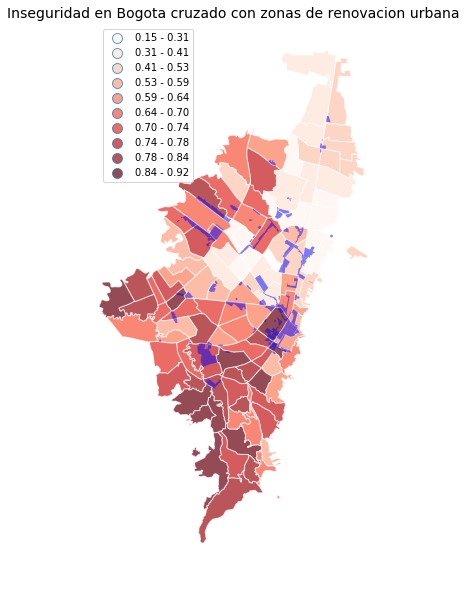

In [88]:
base = inseguridad.plot( figsize=(10,10),column='problema_inseguridad',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.23, 0.8, 0.15, 0.2))

plt.title("Inseguridad en Bogota cruzado con zonas de renovacion urbana", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

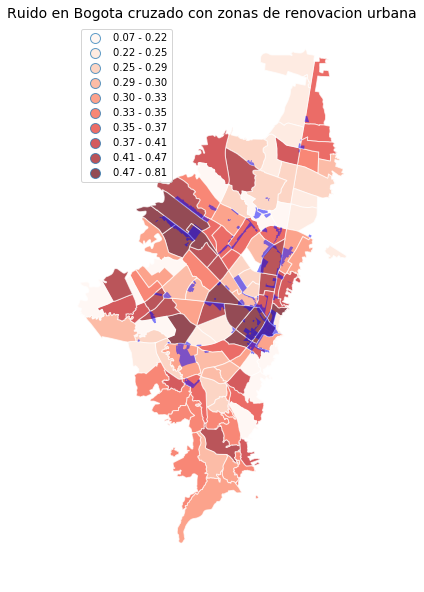

In [89]:
base = inseguridad.plot( figsize=(10,10),column='problema_ruido',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.23, 0.8, 0.15, 0.2))

plt.title("Ruido en Bogota cruzado con zonas de renovacion urbana", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

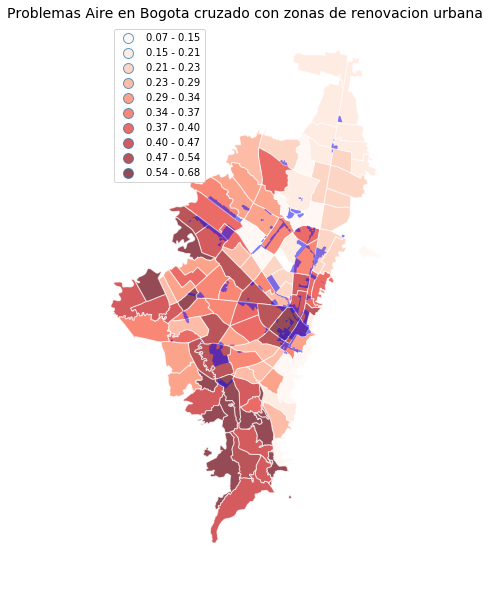

In [90]:
base = inseguridad.plot( figsize=(10,10),column='problema_aire',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.23, 0.8, 0.15, 0.2))

plt.title("Problemas Aire en Bogota cruzado con zonas de renovacion urbana", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

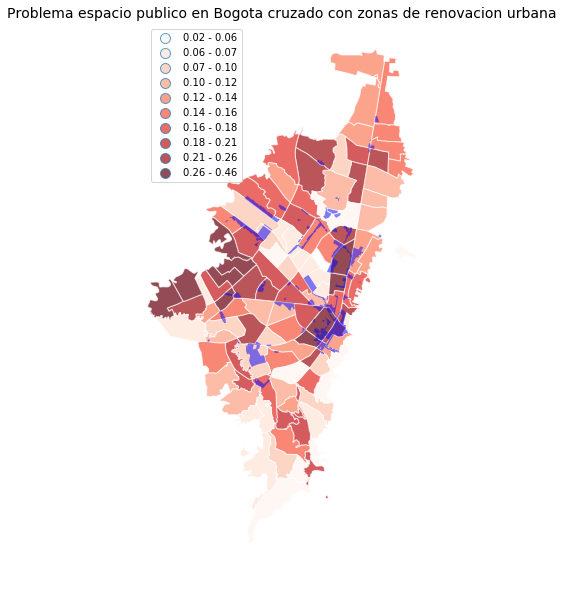

In [91]:
base = inseguridad.plot( figsize=(10,10),column='problema_espacio_publico',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.23, 0.8, 0.15, 0.2))

plt.title("Problema espacio publico en Bogota cruzado con zonas de renovacion urbana", fontsize = 14)
plt.axis("off")

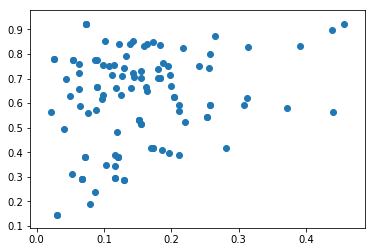

In [92]:
pl.scatter(inseguridad.problema_espacio_publico, inseguridad.problema_inseguridad)

(array([ 3.,  8.,  6., 10.,  8., 13., 15., 22., 16.,  9.]),
 array([0.1464497 , 0.22418803, 0.30192635, 0.37966467, 0.45740299,
        0.53514131, 0.61287964, 0.69061796, 0.76835628, 0.8460946 ,
        0.92383292]),
 <a list of 10 Patch objects>)

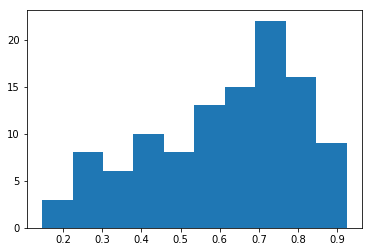

In [93]:
pl.hist(inseguridad.problema_inseguridad)

In [94]:
inseguridad.problema_inseguridad.describe()

count    110.000000
mean       0.610660
std        0.193739
min        0.146450
25%        0.484485
50%        0.641701
75%        0.754697
max        0.923833
Name: problema_inseguridad, dtype: float64

In [95]:
inseguridad.columns

Index(['NUMERO', 'DIRECTORIO', 'SECUENCIA', 'SECUENCIA_P', 'ORDEN', 'DPTOMPIO',
       'CLASE', 'TOT_HOG_COMP', 'FEX_C', 'TIPO_UPZ_x', 'NLOCALIDAD_x',
       'COD_ESTRAT_x', 'AREA_x', 'PERIMETER_x', 'HECTARES_x', 'TIPO_UPZ_y',
       'NLOCALIDAD_y', 'COD_ESTRAT_y', 'AREA_y', 'PERIMETER_y', 'HECTARES_y',
       'numero_pisos', 'tipo_vivienda', 'problema_ruido',
       'problema_publicidad', 'problema_inseguridad', 'problema_aire',
       'problema_olores', 'problema_basuras', 'problema_espacio_publico',
       'problema_animales', 'NOMBRE', 'CLASIFICAC', 'TIPO_UPZ', 'DESC_TIPO',
       'NLOCALIDAD', 'LOCALIDAD', 'ESTRATOS', 'COD_ESTRAT', 'AREA',
       'PERIMETER', 'HECTARES', 'geometry'],
      dtype='object')

In [96]:
df1.columns

Index(['DIRECTORIO', 'SECUENCIA', 'SECUENCIA_P', 'ORDEN', 'NVCAP99',
       'DPTOMPIO', 'CLASE', 'TOT_HOG_COMP', 'FEX_C', 'LOCALIDAD_TEX',
       'COD_UPZ', 'CODLOCALIDAD', 'NUMERO', 'NOMBRE_x', 'CLASIFICAC_x',
       'TIPO_UPZ_x', 'DESC_TIPO_x', 'NLOCALIDAD_x', 'LOCALIDAD_x',
       'ESTRATOS_x', 'COD_ESTRAT_x', 'AREA_x', 'PERIMETER_x', 'HECTARES_x',
       'geometry', 'NOMBRE_y', 'CLASIFICAC_y', 'TIPO_UPZ_y', 'DESC_TIPO_y',
       'NLOCALIDAD_y', 'LOCALIDAD_y', 'ESTRATOS_y', 'COD_ESTRAT_y', 'AREA_y',
       'PERIMETER_y', 'HECTARES_y', 'geometry_y', 'numero_pisos',
       'tipo_vivienda', 'problema_ruido', 'problema_publicidad',
       'problema_inseguridad', 'problema_aire', 'problema_olores',
       'problema_basuras', 'problema_espacio_publico', 'problema_animales'],
      dtype='object')

In [97]:
df1 = df1 [["DIRECTORIO", "LOCALIDAD_TEX", "FEX_C", "NUMERO", "NOMBRE_x", "CLASIFICAC_x",
           "TIPO_UPZ_x", "NLOCALIDAD_x", "LOCALIDAD_x", "ESTRATOS_x", "COD_ESTRAT_x", "AREA_x",
           "HECTARES_x", "geometry", "numero_pisos", "tipo_vivienda", "problema_ruido",
           "problema_publicidad", "problema_inseguridad", "problema_aire", "problema_olores",
           "problema_basuras", "problema_espacio_publico", "problema_animales"]]

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

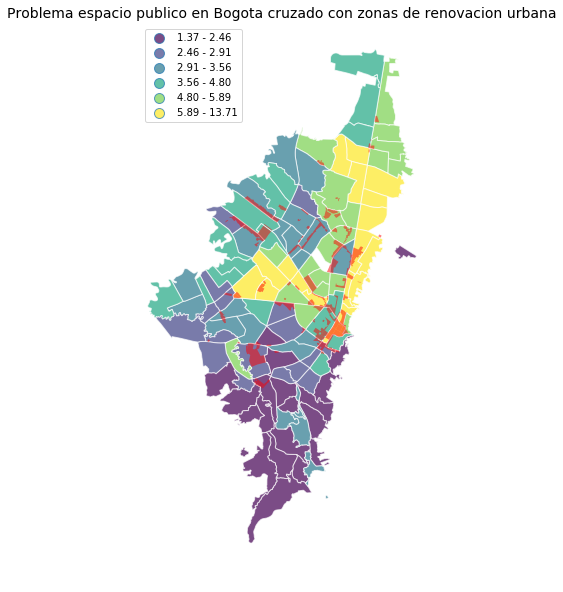

In [98]:
base = inseguridad.plot( figsize=(10,10),column='numero_pisos',cmap='viridis',edgecolor='white',legend=True, scheme = "quantiles", k = 6, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "r", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.23, 0.8, 0.15, 0.2))

plt.title("Problema espacio publico en Bogota cruzado con zonas de renovacion urbana", fontsize = 14)
plt.axis("off")

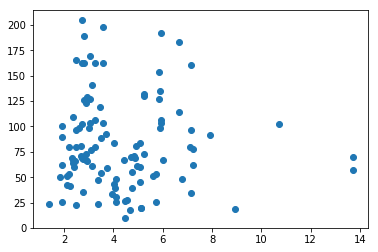

In [99]:
pl.scatter(inseguridad.numero_pisos, pob.densidad)

In [100]:
Y = pob.densidad
X = inseguridad.numero_pisos

alt_dens = pd.concat([Y, X], axis = 1, join = "outer")

In [101]:
lm=smf.ols('Y~X',data=alt_dens).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.1064
Date:                Tue, 18 Sep 2018   Prob (F-statistic):              0.745
Time:                        11:09:49   Log-Likelihood:                -575.64
No. Observations:                 110   AIC:                             1155.
Df Residuals:                     108   BIC:                             1161.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.4658      9.660      8.847      0.000      66.318     104.614
X             -0.6608      2.026     -0.326      0.745      -4.676       3.355
==============================================================================
Omnibus:                        9.881   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.618
Skew:                           0.761   Prob(JB):                      0.00495
Kurtosis:                       2.975   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
pob.ESTRATOS.unique()

array(['ESTRATOS 3, 4, 5 Y 6', 'ESTRATOS VARIOS', 'ESTRATOS 1 Y 2'],
      dtype=object)

In [103]:
pob1 = pob[pob["ESTRATOS"] == "ESTRATOS 1 Y 2"]
inseguridad1 = inseguridad[inseguridad["ESTRATOS"]  == "ESTRATOS 1 Y 2"]

Text(0.5,1,'Densidad vs Altura')

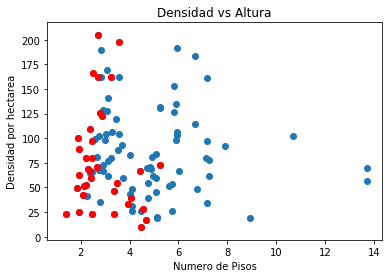

In [104]:
pl.scatter(inseguridad.numero_pisos, pob.densidad, label = "UPZ con estratos mixtos o solo mayores a 1 y 2")
pl.scatter(inseguridad1.numero_pisos, pob1.densidad, c = "r", label = "UPZ solo con Estratos 1 y 2")
plt.xlabel("Numero de Pisos")
plt.ylabel("Densidad por hectarea")
plt.title("Densidad vs Altura")

# Miremos ahora tipo de vivienda

In [105]:
df1.head()

DIRECTORIO LOCALIDAD_TEX      FEX_C NUMERO          NOMBRE_x CLASIFICAC_x  \
0      101000          SUBA  16.604442     23  CASA BLANCA SUBA            d   
1      101020          SUBA  19.107988     23  CASA BLANCA SUBA            d   
2      101022          SUBA  20.413564     23  CASA BLANCA SUBA            d   
3      101023          SUBA  21.122395     23  CASA BLANCA SUBA            d   
4      101024          SUBA  16.604442     23  CASA BLANCA SUBA            d   

   TIPO_UPZ_x  NLOCALIDAD_x LOCALIDAD_x       ESTRATOS_x  COD_ESTRAT_x  \
0           4            11        SUBA  ESTRATOS VARIOS         23456   
1           4            11        SUBA  ESTRATOS VARIOS         23456   
2           4            11        SUBA  ESTRATOS VARIOS         23456   
3           4            11        SUBA  ESTRATOS VARIOS         23456   
4           4            11        SUBA  ESTRATOS VARIOS         23456   

        AREA_x  HECTARES_x                                           geometry  \
0  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   
1  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   
2  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   
3  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   
4  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   

   numero_pisos  tipo_vivienda  problema_ruido  problema_publicidad  \
0             3              2               1                    0   
1             1              1               0                    0   
2             6              2               0                    0   
3             6              2               0                    0   
4             6              2               0                    0   

   problema_inseguridad  problema_aire  problema_olores  problema_basuras  \
0                     1              0                1                 0   
1                     0              0                0                 0   
2                     0              0                0                 0   
3                     0              0                0                 0   
4                     0              0                0                 0   

   problema_espacio_publico  problema_animales  
0                         0                  0  
1                         0                  0  
2                         1                  0  
3                         0                  0  
4                         1                  0

In [106]:
df1.tipo_vivienda.unique()

array([2, 1, 3, 4], dtype=int64)

In [107]:
casa = df1[df1["tipo_vivienda"]==1]
apartamento = df1[df1["tipo_vivienda"]==2]
cuarto = df1[df1["tipo_vivienda"]==3]
otro_tipo = df1[df1["tipo_vivienda"]==4]

In [108]:
print (casa.shape)
print (apartamento.shape)
print (cuarto.shape)
print (otro_tipo.shape)

(21123, 24)
(49578, 24)
(1698, 24)
(4, 24)


In [109]:
casa.columns

Index(['DIRECTORIO', 'LOCALIDAD_TEX', 'FEX_C', 'NUMERO', 'NOMBRE_x',
       'CLASIFICAC_x', 'TIPO_UPZ_x', 'NLOCALIDAD_x', 'LOCALIDAD_x',
       'ESTRATOS_x', 'COD_ESTRAT_x', 'AREA_x', 'HECTARES_x', 'geometry',
       'numero_pisos', 'tipo_vivienda', 'problema_ruido',
       'problema_publicidad', 'problema_inseguridad', 'problema_aire',
       'problema_olores', 'problema_basuras', 'problema_espacio_publico',
       'problema_animales'],
      dtype='object')

In [110]:
casas_upz = casa.groupby(casa["NUMERO"]).sum().reset_index()
aptos_upz = apartamento.groupby(apartamento["NUMERO"]).sum().reset_index()
cuartos_upz = cuarto.groupby(cuarto["NUMERO"]).sum().reset_index()

In [111]:
print(casas_upz.shape)
print(aptos_upz.shape)
print(cuartos_upz.shape)

(89, 18)
(89, 18)
(79, 18)


In [112]:
casas = pd.merge(casas_upz, upz,on="NUMERO")
aptos = pd.merge(aptos_upz, upz,on="NUMERO")
cuartos = pd.merge(cuartos_upz, upz,on="NUMERO")

In [113]:
print(casas.shape)
print(aptos.shape)
print(cuartos.shape)

(110, 30)
(110, 30)
(97, 30)


In [114]:
casas = casas.drop_duplicates(["NUMERO"])
aptos = aptos.drop_duplicates(["NUMERO"])
cuartos = cuartos.drop_duplicates(["NUMERO"])

In [115]:
casas = gp.GeoDataFrame(casas)
aptos = gp.GeoDataFrame(aptos)
cuartos = gp.GeoDataFrame(cuartos)

(82602.5195, 108707.0705, 85625.17227903614, 127854.49806840466)

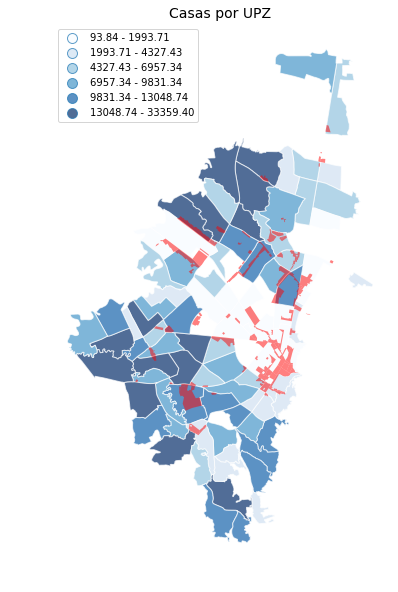

In [116]:
base = casas.plot( figsize=(10,10),column='FEX_C',cmap='Blues',edgecolor='white',legend=True, scheme = "quantiles", k = 6, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "r", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.3, 0.8, 0.15, 0.2))

plt.title("Casas por UPZ", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 85625.17227903614, 127854.49806840466)

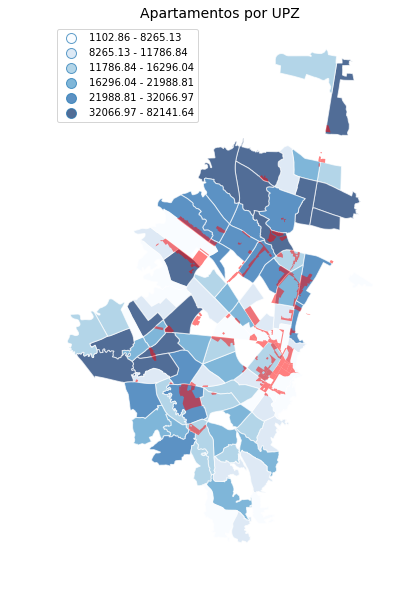

In [117]:
base = aptos.plot( figsize=(10,10),column='FEX_C',cmap='Blues',edgecolor='white',legend=True, scheme = "quantiles", k = 6, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "r", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.3, 0.8, 0.15, 0.2))

plt.title("Apartamentos por UPZ", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 85625.17227903614, 127854.49806840466)

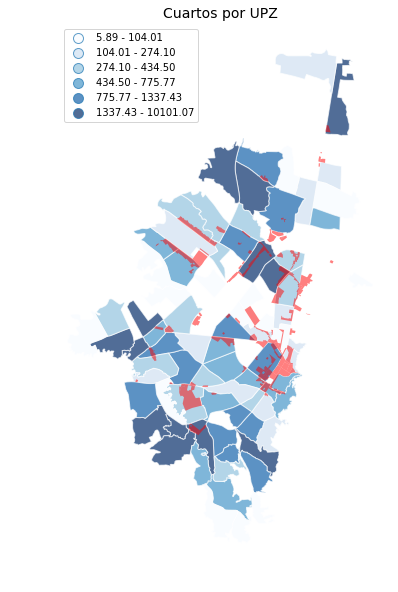

In [118]:
base = cuartos.plot(figsize=(10,10),column='FEX_C',cmap='Blues',edgecolor='white',legend=True, scheme = "quantiles", k = 6, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "r", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.3, 0.8, 0.15, 0.2))

plt.title("Cuartos por UPZ", fontsize = 14)

plt.axis("off")

In [119]:
casas["relacion_casa_apto"] = casas.FEX_C / aptos.FEX_C
casas["relacion_apto_casa"] = aptos.FEX_C / casas.FEX_C

(82602.5195, 108707.07050000002, 85625.17227903612, 127854.49806840465)

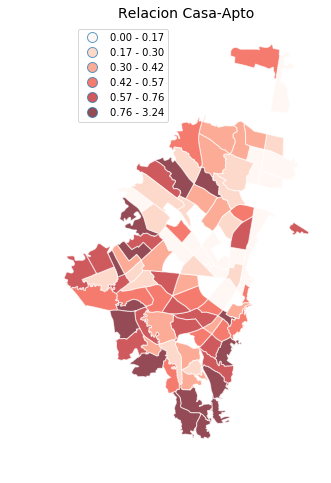

In [120]:
base = casas.plot( figsize=(8,8),column='relacion_casa_apto',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 6, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "r", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.3, 0.8, 0.15, 0.2))

plt.title("Relacion Casa-Apto", fontsize = 14)

plt.axis("off")

(82602.5195, 108707.0705, 85625.17227903614, 127854.49806840466)

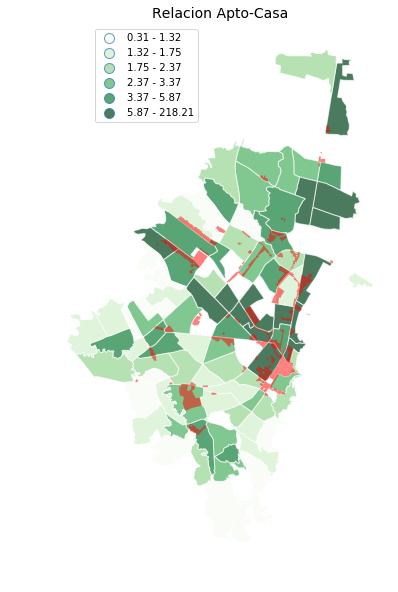

In [121]:
base = casas.plot( figsize=(10,10),column='relacion_apto_casa',cmap='Greens',edgecolor='white',legend=True, scheme = "quantiles", k = 6, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "r", lw = 0.5, alpha = 0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.3, 0.8, 0.15, 0.2))

plt.title("Relacion Apto-Casa", fontsize = 14)

plt.axis("off")

# CHECKPOINT REVISAR UPZ 52

In [122]:
upz_52 = df1[df1["NUMERO"]=="52"]

In [123]:
upz_52.head()

DIRECTORIO LOCALIDAD_TEX     FEX_C NUMERO  NOMBRE_x CLASIFICAC_x  \
20262      101231          USME  6.510487     52  LA FLORA            a   
20263      101232          USME  8.422992     52  LA FLORA            a   
20264      101234          USME  5.627603     52  LA FLORA            a   
20265      101235          USME  7.014051     52  LA FLORA            a   
20266      101236          USME  6.308946     52  LA FLORA            a   

       TIPO_UPZ_x  NLOCALIDAD_x LOCALIDAD_x      ESTRATOS_x  COD_ESTRAT_x  \
20262           1             5        USME  ESTRATOS 1 Y 2             1   
20263           1             5        USME  ESTRATOS 1 Y 2             1   
20264           1             5        USME  ESTRATOS 1 Y 2             1   
20265           1             5        USME  ESTRATOS 1 Y 2             1   
20266           1             5        USME  ESTRATOS 1 Y 2             1   

           AREA_x  HECTARES_x  \
20262  2015748.26     201.575   
20263  2015748.26     201.575   
20264  2015748.26     201.575   
20265  2015748.26     201.575   
20266  2015748.26     201.575   

                                                geometry  numero_pisos  \
20262  (POLYGON ((98171.17962216921 91929.3325120505,...             3   
20263  (POLYGON ((98171.17962216921 91929.3325120505,...             1   
20264  (POLYGON ((98171.17962216921 91929.3325120505,...             1   
20265  (POLYGON ((98171.17962216921 91929.3325120505,...             1   
20266  (POLYGON ((98171.17962216921 91929.3325120505,...             1   

       tipo_vivienda  problema_ruido  problema_publicidad  \
20262              2               1                    0   
20263              1               0                    0   
20264              2               1                    0   
20265              3               0                    0   
20266              1               1                    0   

       problema_inseguridad  problema_aire  problema_olores  problema_basuras  \
20262                     1              0                1                 0   
20263                     1              0                1                 1   
20264                     1              0                0                 0   
20265                     1              0                0                 0   
20266                     1              1                1                 1   

       problema_espacio_publico  problema_animales  
20262                         0                  1  
20263                         0                  1  
20264                         0                  1  
20265                         0                  1  
20266                         0                  1

In [124]:
upz_52.shape

(779, 24)

In [125]:
upz_52_sum = upz_52.groupby(upz_52["NUMERO"]).sum().reset_index()
upz_52_mean = upz_52.groupby(upz_52["NUMERO"]).mean().reset_index()

In [126]:
sum_52 = pd.merge(upz_52_sum, upz,on="NUMERO")
mean_52 = pd.merge(upz_52_mean, upz,on="NUMERO")

In [127]:
sum_52 = gp.GeoDataFrame(sum_52)
mean_52 = gp.GeoDataFrame(mean_52)

No handles with labels found to put in legend.


(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

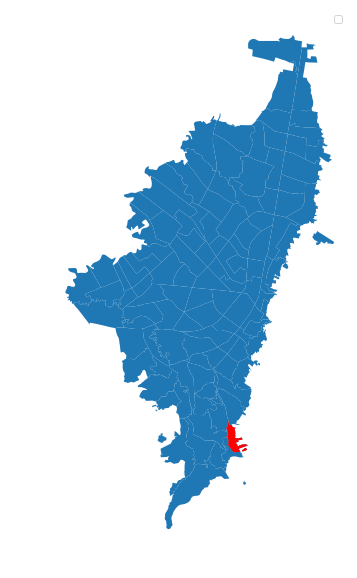

In [128]:
base = upz.plot(figsize=(10,10))

sum_52.plot(ax = base, legend=True, color = "r", lw = 0.5, label = "UPZ 52 -La Flora")
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

plt.legend()
#leg.set_bbox_to_anchor((0.3, 0.8, 0.15, 0.2))

plt.axis("off")

In [129]:
mean_52

NUMERO     DIRECTORIO     FEX_C  TIPO_UPZ_x  NLOCALIDAD_x  COD_ESTRAT_x  \
0     52  163226.349166  6.050263         1.0           5.0           1.0   

       AREA_x  HECTARES_x  numero_pisos  tipo_vivienda  problema_ruido  \
0  2015748.26     201.575      1.372272       1.256739        0.410783   

   problema_publicidad  problema_inseguridad  problema_aire  problema_olores  \
0             0.014121              0.562259       0.084724         0.141207   

   problema_basuras  problema_espacio_publico  problema_animales    NOMBRE  \
0          0.132221                  0.021823           0.304236  LA FLORA   

  CLASIFICAC  TIPO_UPZ                               DESC_TIPO  NLOCALIDAD  \
0          a         1  RESIDENCIAL DE URBANIZACION INCOMPLETA           5   

  LOCALIDAD        ESTRATOS  COD_ESTRAT        AREA  PERIMETER  HECTARES  \
0      USME  ESTRATOS 1 Y 2           1  2015748.26   12079.89   201.575   

                                            geometry  
0  (POLYGON ((98171.17962216921 91929.3325120505,...

In [130]:
#print ("media numero de pisos",inseguridad.numero_pisos.mean())
print ("media problema ruido",inseguridad.problema_ruido.mean())
print ("media problema publicidad", inseguridad.problema_publicidad.mean())
print ("media problema inseguridad",inseguridad.problema_inseguridad.mean())
print ("media problema aire",inseguridad.problema_aire.mean())
print ("media problema olores",inseguridad.problema_olores.mean())
print ("media problema basuras",inseguridad.problema_basuras.mean())
print ("media problema espacio publico",inseguridad.problema_espacio_publico.mean())
print ("media problema animales",inseguridad.problema_animales.mean())

print ("")

#print ("std numero de pisos",inseguridad.numero_pisos.std())
print ("std problema ruido",inseguridad.problema_ruido.std())
print ("std problema publicidad", inseguridad.problema_publicidad.std())
print ("std problema inseguridad",inseguridad.problema_inseguridad.std())
print ("std problema aire",inseguridad.problema_aire.std())
print ("std problema olores",inseguridad.problema_olores.std())
print ("std problema basuras",inseguridad.problema_basuras.std())
print ("std problema espacio publico",inseguridad.problema_espacio_publico.std())
print ("std problema animales",inseguridad.problema_animales.std())

print ("")

#print ("limite superior numero de pisos",inseguridad.numero_pisos.std() + inseguridad.numero_pisos.mean())
print ("limite superior problema ruido",inseguridad.problema_ruido.std()+ inseguridad.problema_ruido.mean())
print ("limite superior problema publicidad", inseguridad.problema_publicidad.std()+ inseguridad.problema_publicidad.mean())
print ("limite superior problema inseguridad",inseguridad.problema_inseguridad.std()+ inseguridad.problema_inseguridad.mean())
print ("limite superior problema aire",inseguridad.problema_aire.std()+ inseguridad.problema_aire.mean())
print ("limite superior problema olores",inseguridad.problema_olores.std()+ inseguridad.problema_olores.mean())
print ("limite superior problema basuras",inseguridad.problema_basuras.std()+ inseguridad.problema_basuras.mean())
print ("limite superior problema espacio publico",inseguridad.problema_espacio_publico.std()+ inseguridad.problema_espacio_publico.mean())
print ("limite superior problema animales",inseguridad.problema_animales.std()+ inseguridad.problema_animales.mean())

print ("")

#print ("upz_52 numero de pisos",mean_52.numero_pisos.mean())
print ("upz_52 problema ruido",mean_52.problema_ruido.mean())
print ("upz_52 problema publicidad", mean_52.problema_publicidad.mean())
print ("upz_52 problema inseguridad",mean_52.problema_inseguridad.mean())
print ("upz_52 problema aire",mean_52.problema_aire.mean())
print ("upz_52 problema olores",mean_52.problema_olores.mean())
print ("upz_52 problema basuras",mean_52.problema_basuras.mean())
print ("upz_52 problema espacio publico",mean_52.problema_espacio_publico.mean())
print ("upz_52 problema animales",mean_52.problema_animales.mean())

media problema ruido 0.342429878070515
media problema publicidad 0.09042683058367648
media problema inseguridad 0.6106595998754138
media problema aire 0.3399400195572546
media problema olores 0.29932895799533143
media problema basuras 0.1740390608877842
media problema espacio publico 0.15236128370643856
media problema animales 0.19267314238798178

std problema ruido 0.12238841553743718
std problema publicidad 0.06211726884784711
std problema inseguridad 0.19373885767312984
std problema aire 0.15063665672103468
std problema olores 0.19706083074651257
std problema basuras 0.10808218816575933
std problema espacio publico 0.08979381590703041
std problema animales 0.11874653186753685

limite superior problema ruido 0.4648182936079522
limite superior problema publicidad 0.15254409943152358
limite superior problema inseguridad 0.8043984575485437
limite superior problema aire 0.49057667627828927
limite superior problema olores 0.49638978874184403
limite superior problema basuras 0.282121249053

### Se notan grandes devíos de la media en temas de numero de pisos (altura baja), quejas por publicidad (bajas), quejas por calidad del aire (bajas), quejas por espacio publico (bajas) y quejas por animales (altos).

### En ese sentido el lote serviría para incrementar la altura promedio de la UPZ, tal vez podría ayudar a resolver el problema que hay con animales, pero no representaría necesariamente un mejoramiento significativo sobre la percepción que se tiene sobre el espacio público en la UPZ 52.

## Veamos como estan de equipamientos

In [131]:
equipamientos = gp.GeoDataFrame.from_file("Equipamientos.shp")

In [132]:
equipamientos.head()

OBJECTID Identifica  Codigo_Lot  Numero_Pre  Numero_Equ     Rupi  \
0         1    10-2017  0031100901           1           1     None   
1         2     1-2116  0044012743           1           1  2426 90   
2         3     1-0074  0045404004           1           4   528 41   
3         4     2-2050  0055071305           1           1     None   
4         5     1-2117  0056152601           1           1     None   

  Identifi_1                                             nombre  \
0       None                          MINISTERIO DE AGRICULTURA   
1       None  COLEGIO DISTRITAL LUIS VARGAS TEJADA - SEDE B ...   
2       None       COLEGIO DISTRITAL SAN RAFAEL SEDE B CATALINA   
3       None                          JARDIN LOS ASES DEL SABER   
4       None                   COLEGIO DISTRITAL SAN JOSE NORTE   

            Dirección Telefono Escala             Sector_tex  \
0        AC 13 7 A 17     None   METR  Sedes Administrativas   
1   KR 52 D 24 50 SUR     None   ZONA              Educación   
2  CL 52 A SUR 77 W 5  4501103   ZONA              Educación   
3       CL 55 70 D 54     None   VECI       Bienestar Social   
4      KR 84 A 75 A 8     None   ZONA              Educación   

         Tipo_texto Caracter Estrato  CHIP  Puntaje_Es Permanenci Componente  \
0  Entidad Nacional     PUBL       0  None        0.00       None          1   
1           Colegio     PUBL       0  None       42.50       None          2   
2           Colegio     PUBL       0  None       42.50       None          2   
3   Jardin Infantil     PUBL       0  None        0.00       None          2   
4           Colegio     PUBL       0  None       51.25       None          2   

                              Observacio Precision Escala_Cap  Fecha_capt  \
0   Equipamientos para Servicios Básicos      None       1000  2011-01-01   
1  Equipamientos para Servicios Sociales      None       1000  2011-01-01   
2  Equipamientos para Servicios Sociales      None       1000  2011-01-01   
3  Equipamientos para Servicios Sociales      None        534  2011-01-01   
4  Equipamientos para Servicios Sociales      None       1000  2011-01-01   

   Shape_Leng   Shape_Area DESCRIP OBSERVA  \
0  190.902450  2142.481636   Metro    None   
1  225.997533  2656.402463   Metro    None   
2  338.147743  6579.091135    None    None   
3   78.804108   358.960127    None    None   
4  365.387104  5193.586209    None    None   

                                            geometry  
0  POLYGON ((100358.5284000002 100618.8758000005,...  
1  POLYGON ((94502.50380000006 101376.2522999998,...  
2  POLYGON ((89871.48139999993 101588.6962000001,...  
3  POLYGON ((97131.25590000022 108310.9276999999,...  
4  POLYGON ((97310.59350000042 111369.9118000008,...

# Volvamos a hacer análisis de capitulo C

In [133]:
cap_c = pd.read_csv("Capitulo_C.csv", ";")

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (68,69,70,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [134]:
cap_c.head()

DIRECTORIO_HOG  DIRECTORIO  SECUENCIA_P  ORDEN  NHCCP1   NHCCP2 NHCCP3  \
0         1010001      101000            1      1       1               1   
1         1010011      101001            1      1       2  1150000      1   
2         1010021      101002            1      1       1               1   
3         1010031      101003            1      1       1               1   
4         1010041      101004            1      1       3                   

  NHCCP4A NHCCP4B NHCCP4C NHCCP4D NHCCP4E NHCCP4F     NHCCP5 NHCCP6  \
0       1                                          600000000   1997   
1       1                                          125000000   2014   
2       1                                          200000000   1980   
3       1                                          400000000   1982   
4                                                                     

      NHCCP7 NHCCP8A NHCCP8B NHCCP8C NHCCP8D NHCCP8E NHCCP8F NHCCP8G NHCCP8H  \
0                                                                              
1  100000000       1                                                           
2                                                                              
3                                                                              
4                                                                              

  NHCCP8I NHCCP8J   NHCCP9  NHCCP10  NHCCP11 NHCCP12 NHCCP13A NHCCP13B  \
0                  3500000                 2       1                     
1                  1000000                 2       1                     
2                  1000000                 2       1                     
3                  1400000                 2       1                     
4                           1900000        2       6                     

  NHCCP13C NHCCP13D NHCCP13E NHCCP13F NHCCP13G NHCCP13H NHCCP13I NHCCP13J  \
0                                                                           
1                                                                           
2                                                                           
3                                                                           
4                                                                           

   NHCCP14 NHCCP14A  NHCCP15 NHCCP15A  NHCCPCTRL2  NHCCP19  NHCCP20  NHCCP20A  \
0        3                 2                    3        4        4         4   
1        1    65000        2                    4        4        2         2   
2        3                 2                    2        3        2         2   
3        3                 2                    3        6        2         1   
4        1   290000        2                    1        3        1         1   

   NHCCP21A  NHCCP21B NHCCP22A NHCCP22B NHCCP22C NHCCP22D NHCCP22E NHCCP22F  \
0         1         1        1                                                
1         1         1        1                                                
2         1         1        1                 1        1                     
3         1         1                          1        1                 1   
4         1         1                          1        1                 1   

  NHCCP22G  NHCCP23 NHCCP24 NHCCP25 NHCCP26 NHCCP26A  NHCCP27 NHCCP28  \
0                 1               1       2                 1       1   
1                 1               1       2                 1       1   
2                 1               1       2                 1       1   
3                 1               1       2                 1       1   
4                 5       1                                 1       1   

  NHCCP28A NHCCP29 NHCCP29A  NHCCP31 NHCCP32 NHCCP33 NHCCP34  NHCCP35  \
0                1                 1       4       1       1        1   
1                1                 1       2       1       1        1   
2                1                 1       2       1       1        1   
3                1             

In [135]:
cap_c.shape

(109111, 137)

In [136]:
cap_b.shape

(107218, 11)

In [137]:
cap_c.head(1)

DIRECTORIO_HOG  DIRECTORIO  SECUENCIA_P  ORDEN  NHCCP1 NHCCP2 NHCCP3  \
0         1010001      101000            1      1       1             1   

  NHCCP4A NHCCP4B NHCCP4C NHCCP4D NHCCP4E NHCCP4F     NHCCP5 NHCCP6 NHCCP7  \
0       1                                          600000000   1997          

  NHCCP8A NHCCP8B NHCCP8C NHCCP8D NHCCP8E NHCCP8F NHCCP8G NHCCP8H NHCCP8I  \
0                                                                           

  NHCCP8J   NHCCP9 NHCCP10  NHCCP11 NHCCP12 NHCCP13A NHCCP13B NHCCP13C  \
0          3500000                2       1                              

  NHCCP13D NHCCP13E NHCCP13F NHCCP13G NHCCP13H NHCCP13I NHCCP13J  NHCCP14  \
0                                                                       3   

  NHCCP14A  NHCCP15 NHCCP15A  NHCCPCTRL2  NHCCP19  NHCCP20  NHCCP20A  \
0                 2                    3        4        4         4   

   NHCCP21A  NHCCP21B NHCCP22A NHCCP22B NHCCP22C NHCCP22D NHCCP22E NHCCP22F  \
0         1         1        1                                                

  NHCCP22G  NHCCP23 NHCCP24 NHCCP25 NHCCP26 NHCCP26A  NHCCP27 NHCCP28  \
0                 1               1       2                 1       1   

  NHCCP28A NHCCP29 NHCCP29A  NHCCP31 NHCCP32 NHCCP33 NHCCP34  NHCCP35  \
0                1                 1       4       1       1        1   

  NHCCP35A NHCCP36A NHCCP36B NHCCP36C NHCCP36D  NHCCP37  NHCCP38 NHCCP38A  \
0        3        1        1                          1        1        1   

  NHCCP38B NHCCP38C NHCCP38D NHCCP38E NHCCP38F NHCCP38G  NHCCP39A  NHCCP39B  \
0                                                               1         1   

   NHCCP393  NHCCP39C  NHCCP39D  NHCCP39E  NHCCP39F  NHCCP39G  NHCCP399  \
0         1         1         2         1         2         1         2   

   NHCCP40A  NHCCP40B  NHCCP40C  NHCCP40D  NHCCP40E  NHCCP40F  NHCCP40G  \
0         1         1         1         1         1         1         2   

   NHCCP40H  NHCCP40I  NHCCP40J  NHCCP40K  NHCCP40L  NHCCP40M  NHCCP40N  \
0         1         2         1         1         2         1         1   

   NHCCP40O  NHCCP40P  NHCCP41 NHCCP41A NHCCP41B NHCCP42 NHCCP42A NHCCP42CB  \
0         2         2        1        1        1       1        1             

   NHCCP44 NHCCP44A NHCCP44B  NHCCP45 NHCCP45A NHCCP45B NHCCP46A NHCCP46B  \
0        2                          1        1        1       15        2   

   NHCCP46C  NHCCP46D  NHCCP46E  NHCCP46F  NHCCP46G  NHCCP46H  NHCCP46I  \
0        15        60        10         1         2        20        30   

   NHCCP46J  NHCCP46K  NHCCP46L  NHCCP46M         FEX_C  
0        20        30        10        30  16,604442041

In [138]:
cap_c = cap_c[["DIRECTORIO","DIRECTORIO_HOG","FEX_C", "NHCCP1","NHCCP9","NHCCP10","NHCCP11","NHCCP15","NHCCP15A","NHCCPCTRL2",
              "NHCCP19","NHCCP35","NHCCP35A","NHCCP41","NHCCP41A","NHCCP44","NHCCP44A","NHCCP45","NHCCP45A",
               "NHCCP46A","NHCCP46B","NHCCP46C","NHCCP46D","NHCCP46E","NHCCP46F","NHCCP46G","NHCCP46H","NHCCP46I","NHCCP46J",
              "NHCCP46K","NHCCP46L","NHCCP46M"]]

In [139]:
cap_c.shape

(109111, 32)

In [140]:
cap_c["propiedad_o_arriendo"]=cap_c["NHCCP1"]     
cap_c["arriendo_hipotetico"]=cap_c["NHCCP9"]     
cap_c["arriendo_real"]=cap_c["NHCCP10"]    
cap_c["planes_adquisicion_vivienda"]=cap_c["NHCCP11"]    
cap_c["subsidio"]=cap_c["NHCCP15"]    
cap_c["monto_subsidio"]=cap_c["NHCCP15A"]   
cap_c["personas_en_hogar"]=cap_c["NHCCPCTRL2"] 
cap_c["numero_cuartos"]=cap_c["NHCCP19"]    
cap_c["dispone_baños"]=cap_c["NHCCP35"]    
cap_c["numero_baños"]=cap_c["NHCCP35A"]   
cap_c["poseen_carro"]=cap_c["NHCCP41"]    
cap_c["cuantos_carros"]=cap_c["NHCCP41A"]   
cap_c["poseen_moto"]=cap_c["NHCCP44"]    
cap_c["cuantas_motos"]=cap_c["NHCCP44A"]   
cap_c["poseen_bici"]=cap_c["NHCCP45"]    
cap_c["cuantas_bicis"]=cap_c["NHCCP45A"]   
cap_c["tiempo_caminando_transmilenio_alimentador"]=cap_c["NHCCP46A"]   
cap_c["tiempo_caminando_SITP"]=cap_c["NHCCP46B"]   
cap_c["tiempo_caminando_paradero"]=cap_c["NHCCP46C"]   
cap_c["tiempo_caminando_intermunicipal"]=cap_c["NHCCP46D"]   
cap_c["tiempo_caminando_parque"]=cap_c["NHCCP46E"]   
cap_c["tiempo_caminando_tienda_supermercado"]=cap_c["NHCCP46F"]   
cap_c["tiempo_caminando_farmacia"]=cap_c["NHCCP46G"]   
cap_c["tiempo_caminando_banco"]=cap_c["NHCCP46H"]   
cap_c["tiempo_caminando_CAI_estacion_policia"]=cap_c["NHCCP46I"]   
cap_c["tiempo_caminando_biblioteca"]=cap_c["NHCCP46J"]   
cap_c["tiempo_caminando_cultura_recreacion"]=cap_c["NHCCP46K"]   
cap_c["tiempo_caminando_cicloruta"]=cap_c["NHCCP46L"]   
cap_c["tiempo_caminando_medico"]=cap_c["NHCCP46M"]   

In [141]:
cap_c.columns

Index(['DIRECTORIO', 'DIRECTORIO_HOG', 'FEX_C', 'NHCCP1', 'NHCCP9', 'NHCCP10',
       'NHCCP11', 'NHCCP15', 'NHCCP15A', 'NHCCPCTRL2', 'NHCCP19', 'NHCCP35',
       'NHCCP35A', 'NHCCP41', 'NHCCP41A', 'NHCCP44', 'NHCCP44A', 'NHCCP45',
       'NHCCP45A', 'NHCCP46A', 'NHCCP46B', 'NHCCP46C', 'NHCCP46D', 'NHCCP46E',
       'NHCCP46F', 'NHCCP46G', 'NHCCP46H', 'NHCCP46I', 'NHCCP46J', 'NHCCP46K',
       'NHCCP46L', 'NHCCP46M', 'propiedad_o_arriendo', 'arriendo_hipotetico',
       'arriendo_real', 'planes_adquisicion_vivienda', 'subsidio',
       'monto_subsidio', 'personas_en_hogar', 'numero_cuartos',
       'dispone_baños', 'numero_baños', 'poseen_carro', 'cuantos_carros',
       'poseen_moto', 'cuantas_motos', 'poseen_bici', 'cuantas_bicis',
       'tiempo_caminando_transmilenio_alimentador', 'tiempo_caminando_SITP',
       'tiempo_caminando_paradero', 'tiempo_caminando_intermunicipal',
       'tiempo_caminando_parque', 'tiempo_caminando_tienda_supermercado',
       'tiempo_caminando_farmacia'

In [142]:
cap_c = cap_c[["DIRECTORIO","DIRECTORIO_HOG","FEX_C", "propiedad_o_arriendo","arriendo_hipotetico","arriendo_real",
               "planes_adquisicion_vivienda","subsidio","monto_subsidio","personas_en_hogar",
              "numero_cuartos","dispone_baños","numero_baños","poseen_carro","cuantos_carros",
               "poseen_moto","cuantas_motos","poseen_bici","cuantas_bicis",
               "tiempo_caminando_transmilenio_alimentador","tiempo_caminando_SITP","tiempo_caminando_paradero",
               "tiempo_caminando_intermunicipal","tiempo_caminando_parque","tiempo_caminando_tienda_supermercado",
               "tiempo_caminando_farmacia","tiempo_caminando_banco","tiempo_caminando_CAI_estacion_policia",
               "tiempo_caminando_biblioteca","tiempo_caminando_cultura_recreacion","tiempo_caminando_cicloruta",
               "tiempo_caminando_medico"]]

In [143]:
cap_c.shape

(109111, 32)

In [144]:
df2 = pd.merge(df1, upz, left_on="NUMERO", right_on="NUMERO", how = "right")


In [145]:
df2.shape

(87711, 36)

In [146]:
df2 = df2.drop_duplicates(["DIRECTORIO"])

In [147]:
df2.shape

(72404, 36)

In [148]:
df2 = pd.merge(df2, cap_c, on = "DIRECTORIO")

In [149]:
df2.shape

(73662, 67)

In [150]:
df2.describe()

DIRECTORIO       FEX_C_x    TIPO_UPZ_x  NLOCALIDAD_x  COD_ESTRAT_x  \
count   73662.000000  73662.000000  73662.000000  73662.000000  73662.000000   
mean   199320.994746     36.306315      2.887120      9.709226    702.783864   
std     62411.976865     27.934767      2.114763      4.971606   3535.317448   
min    101000.000000      2.417681      1.000000      1.000000      1.000000   
25%    143042.250000     15.743414      1.000000      6.000000      3.000000   
50%    185763.500000     29.017457      2.000000      9.000000     23.000000   
75%    255246.750000     49.923267      4.000000     13.000000     34.000000   
max    315178.000000    273.059235      8.000000     19.000000  23456.000000   

             AREA_x    HECTARES_x  numero_pisos  tipo_vivienda  \
count  7.366200e+04  73662.000000  73662.000000   73662.000000   
mean   3.751904e+06    375.190328      4.055660       1.727023   
std    1.717535e+06    171.753496      3.455948       0.496044   
min    7.983222e+05     79.832000      1.000000       1.000000   
25%    2.375423e+06    237.542000      2.000000       1.000000   
50%    3.594233e+06    359.423000      3.000000       2.000000   
75%    4.740557e+06    474.056000      5.000000       2.000000   
max    8.172917e+06    817.292000     35.000000       4.000000   

       problema_ruido  problema_publicidad  problema_inseguridad  \
count    73662.000000         73662.000000          73662.000000   
mean         0.341275             0.093372              0.629565   
std          0.474141             0.290956              0.482925   
min          0.000000             0.000000              0.000000   
25%          0.000000             0.000000              0.000000   
50%          0.000000             0.000000              1.000000   
75%          1.000000             0.000000              1.000000   
max          1.000000             1.000000              1.000000   

       problema_aire  problema_olores  problema_basuras  \
count   73662.000000     73662.000000      73662.000000   
mean        0.342619         0.303684          0.183052   
std         0.474589         0.459851          0.386712   
min         0.000000         0.000000          0.000000   
25%         0.000000         0.000000          0.000000   
50%         0.000000         0.000000          0.000000   
75%         1.000000         1.000000          0.000000   
max         1.000000         1.000000          1.000000   

       problema_espacio_publico  problema_animales      TIPO_UPZ  \
count              73662.000000       73662.000000  73662.000000   
mean                   0.158508           0.198556      2.887120   
std                    0.365219           0.398915      2.114763   
min                    0.000000           0.000000      1.000000   
25%                    0.000000           0.000000      1.000000   
50%                    0.000000           0.000000      2.000000   
75%                    0.000000           0.000000      4.000000   
max                    1.000000           1.000000      8.000000   

         NLOCALIDAD    COD_ESTRAT          AREA     PERIMETER      HECTARES  \
count  73662.000000  73662.000000  7.366200e+04  73662.000000  73662.000000   
mean       9.709226    702.783864  3.751904e+06  10146.258630    375.190328   
std        4.971606   3535.317448  1.717535e+06   3311.666264    171.753496   
min        1.000000      1.000000  7.983222e+05   5411.220000     79.832000   
25%        6.000000      3.000000  2.375423e+06   7131.226000    237.542000   
50%        9.000000     23.000000  3.594233e+06   9476.785000    359.423000   
75%       13.000000     34.000000  4.740557e+06  12879.963000    474.056000   
max       19.000000  23456.000000  8.172917e+06  18952.744000    817.292000   

       DIRECTORIO_HOG  propiedad_o_arriendo  planes_adquisicion_vivienda  \
count    7.366200e+04          73662.000000                 73662.000000   
mean     1.993211e+06              2.112595                     1.760555

In [151]:
df2["subsidio"] = df2.subsidio.replace(2,0)
df2["dispone_baños"] = df2.dispone_baños.replace(2,0)
df2["poseen_carro"] = df2.poseen_carro.replace(2,0)
df2["poseen_moto"] = df2.poseen_moto.replace(2,0)
df2["poseen_bici"] = df2.poseen_bici.replace(2,0)


In [152]:
df2.head()

DIRECTORIO LOCALIDAD_TEX    FEX_C_x NUMERO          NOMBRE_x CLASIFICAC_x  \
0    101000.0          SUBA  16.604442     23  CASA BLANCA SUBA            d   
1    101020.0          SUBA  19.107988     23  CASA BLANCA SUBA            d   
2    101022.0          SUBA  20.413564     23  CASA BLANCA SUBA            d   
3    101023.0          SUBA  21.122395     23  CASA BLANCA SUBA            d   
4    101024.0          SUBA  16.604442     23  CASA BLANCA SUBA            d   

   TIPO_UPZ_x  NLOCALIDAD_x LOCALIDAD_x       ESTRATOS_x  COD_ESTRAT_x  \
0         4.0          11.0        SUBA  ESTRATOS VARIOS       23456.0   
1         4.0          11.0        SUBA  ESTRATOS VARIOS       23456.0   
2         4.0          11.0        SUBA  ESTRATOS VARIOS       23456.0   
3         4.0          11.0        SUBA  ESTRATOS VARIOS       23456.0   
4         4.0          11.0        SUBA  ESTRATOS VARIOS       23456.0   

        AREA_x  HECTARES_x                                         geometry_x  \
0  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   
1  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   
2  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   
3  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   
4  4199189.396     419.919  POLYGON ((101301.968398328 118170.407855043, 1...   

   numero_pisos  tipo_vivienda  problema_ruido  problema_publicidad  \
0           3.0            2.0             1.0                  0.0   
1           1.0            1.0             0.0                  0.0   
2           6.0            2.0             0.0                  0.0   
3           6.0            2.0             0.0                  0.0   
4           6.0            2.0             0.0                  0.0   

   problema_inseguridad  problema_aire  problema_olores  problema_basuras  \
0                   1.0            0.0              1.0               0.0   
1                   0.0            0.0              0.0               0.0   
2                   0.0            0.0              0.0               0.0   
3                   0.0            0.0              0.0               0.0   
4                   0.0            0.0              0.0               0.0   

   problema_espacio_publico  problema_animales            NOMBRE CLASIFICAC  \
0                       0.0                0.0  CASA BLANCA SUBA          d   
1                       0.0                0.0  CASA BLANCA SUBA          d   
2                       1.0                0.0  CASA BLANCA SUBA          d   
3                       0.0                0.0  CASA BLANCA SUBA          d   
4                       1.0                0.0  CASA BLANCA SUBA          d   

   TIPO_UPZ   DESC_TIPO  NLOCALIDAD LOCALIDAD         ESTRATOS  COD_ESTRAT  \
0         4  DESARROLLO          11      SUBA  ESTRATOS VARIOS       23456   
1         4  DESARROLLO          11      SUBA  ESTRATOS VARIOS       23456   
2         4  DESARROLLO          11      SUBA  ESTRATOS VARIOS       23456   
3         4  DESARROLLO          11      SUBA  ESTRATOS VARIOS       23456   
4         4  DESARROLLO          11      SUBA  ESTRATOS VARIOS       23456   

          AREA  PERIMETER  HECTARES  \
0  4199189.396  10340.523   419.919   
1  4199189.396  10340.523   419.919   
2  4199189.396  10340.523   419.919   
3  4199189.396  10340.523   419.919   
4  4199189.396  10340.523   419.919   

                                          geometry_y  DIRECTORIO_HOG  \
0  POLYGON ((101301.968398328 118170.407855043, 1...         1010001   
1  POLYGON ((101301.968398328 118170.407855043, 1...         1010201   
2  POLYGON ((101301.968398328 118170.407855043, 1...         1010221   
3  POLYGON ((101301.968398328 118170.407855043, 1...         1010231   
4  POLYGON ((101301.968398328 118170.407855043, 1...         1010241   

        FEX_C_y  propiedad_o_arriendo arriendo_hipotetico arriendo_real  \
0  16,6044420

In [153]:
df2.to_csv('multiproposito_hasta_cap_c.csv')

# Ya tenemos la base integrada con el capitulo C. Para empezar a ver las diferentes variables vamos a romper la base de datos por variable de interés

In [154]:
df2.columns

Index(['DIRECTORIO', 'LOCALIDAD_TEX', 'FEX_C_x', 'NUMERO', 'NOMBRE_x',
       'CLASIFICAC_x', 'TIPO_UPZ_x', 'NLOCALIDAD_x', 'LOCALIDAD_x',
       'ESTRATOS_x', 'COD_ESTRAT_x', 'AREA_x', 'HECTARES_x', 'geometry_x',
       'numero_pisos', 'tipo_vivienda', 'problema_ruido',
       'problema_publicidad', 'problema_inseguridad', 'problema_aire',
       'problema_olores', 'problema_basuras', 'problema_espacio_publico',
       'problema_animales', 'NOMBRE', 'CLASIFICAC', 'TIPO_UPZ', 'DESC_TIPO',
       'NLOCALIDAD', 'LOCALIDAD', 'ESTRATOS', 'COD_ESTRAT', 'AREA',
       'PERIMETER', 'HECTARES', 'geometry_y', 'DIRECTORIO_HOG', 'FEX_C_y',
       'propiedad_o_arriendo', 'arriendo_hipotetico', 'arriendo_real',
       'planes_adquisicion_vivienda', 'subsidio', 'monto_subsidio',
       'personas_en_hogar', 'numero_cuartos', 'dispone_baños', 'numero_baños',
       'poseen_carro', 'cuantos_carros', 'poseen_moto', 'cuantas_motos',
       'poseen_bici', 'cuantas_bicis',
       'tiempo_caminando_transmil

In [155]:
df2.rename(columns={'geometry_x': 'geometry'}, inplace=True)
df2.rename(columns={'FEX_C_x': 'FEX_C'}, inplace=True)

In [156]:
propiedad_arriendo = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
                             "ESTRATOS_x","HECTARES", "geometry", "propiedad_o_arriendo"]]

arriendo_h = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
                     "ESTRATOS_x","HECTARES", "geometry", "arriendo_hipotetico"]]

arriendo_r = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
                  "ESTRATOS_x","HECTARES", "geometry",  "arriendo_real"]]

motos = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
             "ESTRATOS_x","HECTARES", "geometry", "poseen_moto", "cuantas_motos"]]

carros = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
              "ESTRATOS_x","HECTARES", "geometry", "poseen_carro", "cuantos_carros"]]

bicis = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
             "ESTRATOS_x","HECTARES", "geometry", "poseen_bici", "cuantas_bicis"]]

cuartos = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
               "ESTRATOS_x","HECTARES", "geometry", "numero_cuartos"]]

baños = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
             "ESTRATOS_x","HECTARES", "geometry", "dispone_baños", "numero_baños"]]

subsidios = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
                 "ESTRATOS_x","HECTARES", "geometry", "subsidio", "monto_subsidio"]]

adquirir_vivienda = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
                         "ESTRATOS_x","HECTARES", "geometry", "planes_adquisicion_vivienda"]]

personas_componen_hogar = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
                               "ESTRATOS_x","HECTARES", "geometry", "personas_en_hogar"]]

tiempo_caminando = df2[["DIRECTORIO","LOCALIDAD","FEX_C","NUMERO","TIPO_UPZ_x","LOCALIDAD_x",
                        "ESTRATOS_x","HECTARES", "geometry",'tiempo_caminando_transmilenio_alimentador',
                        'tiempo_caminando_SITP','tiempo_caminando_paradero', 'tiempo_caminando_intermunicipal',
                        'tiempo_caminando_parque', 'tiempo_caminando_tienda_supermercado','tiempo_caminando_farmacia',
                        'tiempo_caminando_banco','tiempo_caminando_CAI_estacion_policia', 'tiempo_caminando_biblioteca',
                        'tiempo_caminando_cultura_recreacion', 'tiempo_caminando_cicloruta','tiempo_caminando_medico']]





In [157]:
propiedad_arriendo.head()

DIRECTORIO LOCALIDAD      FEX_C NUMERO  TIPO_UPZ_x LOCALIDAD_x  \
0    101000.0      SUBA  16.604442     23         4.0        SUBA   
1    101020.0      SUBA  19.107988     23         4.0        SUBA   
2    101022.0      SUBA  20.413564     23         4.0        SUBA   
3    101023.0      SUBA  21.122395     23         4.0        SUBA   
4    101024.0      SUBA  16.604442     23         4.0        SUBA   

        ESTRATOS_x  HECTARES  \
0  ESTRATOS VARIOS   419.919   
1  ESTRATOS VARIOS   419.919   
2  ESTRATOS VARIOS   419.919   
3  ESTRATOS VARIOS   419.919   
4  ESTRATOS VARIOS   419.919   

                                            geometry  propiedad_o_arriendo  
0  POLYGON ((101301.968398328 118170.407855043, 1...                     1  
1  POLYGON ((101301.968398328 118170.407855043, 1...                     3  
2  POLYGON ((101301.968398328 118170.407855043, 1...                     2  
3  POLYGON ((101301.968398328 118170.407855043, 1...                     1  
4  POLYGON ((101301.968398328 118170.407855043, 1...                     1

# Ya tenemos las bases de datos como queríamos ahora veamos variable por variable

In [158]:
propietarios = propiedad_arriendo[propiedad_arriendo.propiedad_o_arriendo == 1]
propietarios_pagando = propiedad_arriendo[propiedad_arriendo.propiedad_o_arriendo == 2]
arrendatarios = propiedad_arriendo[propiedad_arriendo.propiedad_o_arriendo == 3]

In [159]:
propietarios.head()

DIRECTORIO LOCALIDAD      FEX_C NUMERO  TIPO_UPZ_x LOCALIDAD_x  \
0    101000.0      SUBA  16.604442     23         4.0        SUBA   
3    101023.0      SUBA  21.122395     23         4.0        SUBA   
4    101024.0      SUBA  16.604442     23         4.0        SUBA   
5    101025.0      SUBA   7.827822     23         4.0        SUBA   
6    101026.0      SUBA  15.018773     23         4.0        SUBA   

        ESTRATOS_x  HECTARES  \
0  ESTRATOS VARIOS   419.919   
3  ESTRATOS VARIOS   419.919   
4  ESTRATOS VARIOS   419.919   
5  ESTRATOS VARIOS   419.919   
6  ESTRATOS VARIOS   419.919   

                                            geometry  propiedad_o_arriendo  
0  POLYGON ((101301.968398328 118170.407855043, 1...                     1  
3  POLYGON ((101301.968398328 118170.407855043, 1...                     1  
4  POLYGON ((101301.968398328 118170.407855043, 1...                     1  
5  POLYGON ((101301.968398328 118170.407855043, 1...                     1  
6  POLYGON ((101301.968398328 118170.407855043, 1...                     1

In [160]:
propietarios_upz = propietarios.groupby(propietarios["NUMERO"]).sum().reset_index()
propietarios_pagando_upz = propietarios_pagando.groupby(propietarios_pagando["NUMERO"]).sum().reset_index()
arrendatarios_upz = arrendatarios.groupby(arrendatarios["NUMERO"]).sum().reset_index()

In [161]:
prop = pd.merge(propietarios_upz, upz, left_on="NUMERO", right_on="NUMERO")
prop_p = pd.merge(propietarios_pagando_upz, upz, left_on="NUMERO", right_on="NUMERO")
arrend = pd.merge(arrendatarios_upz, upz, left_on="NUMERO", right_on="NUMERO")

In [162]:
prop = gp.GeoDataFrame(prop)
prop_p = gp.GeoDataFrame(prop_p)
arrend = gp.GeoDataFrame(arrend)

In [163]:
prop["propiedad_pagando"] = prop_p["FEX_C"]
prop["arrendando"] = arrend["FEX_C"]

prop["proporcion_prop"] = (prop["FEX_C"] + prop["propiedad_pagando"]) / (prop["arrendando"] + prop["FEX_C"] + prop["propiedad_pagando"]) 
prop["proporcion_arrend"] = (prop["arrendando"]) / (prop["propiedad_pagando"] + prop["FEX_C"] + prop["arrendando"]) 

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

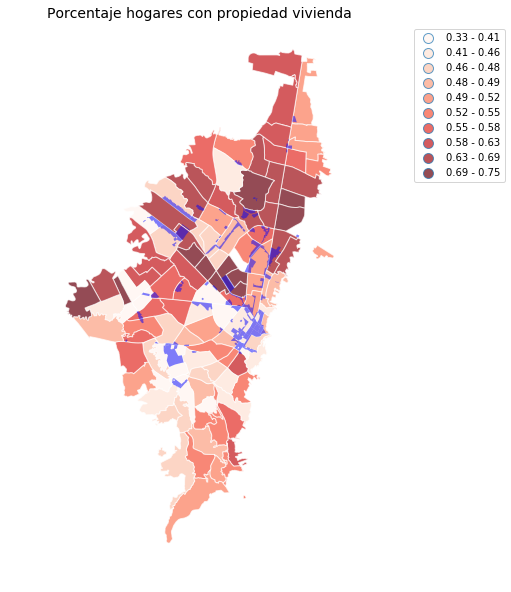

In [164]:
base = prop.plot( figsize=(10,10),column='proporcion_prop',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("Porcentaje hogares con propiedad vivienda", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

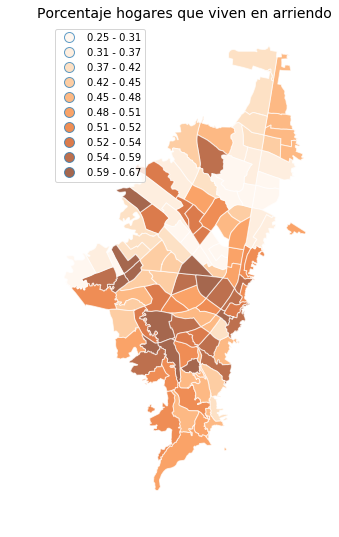

In [165]:
base = prop.plot( figsize=(9,9),column='proporcion_arrend',cmap='Oranges',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.22, 0.8, 0.15, 0.2))

plt.title("Porcentaje hogares que viven en arriendo", fontsize = 14)
plt.axis("off")

In [166]:
prop.proporcion_arrend.mean()

0.4648664339964199

# Ya vimos en qué UPZ arrienda más la gente, ahora veamos en cuales paga más

In [167]:
arriendo_r.shape

(73662, 10)

In [168]:
arriendo_r.head(2)

DIRECTORIO LOCALIDAD      FEX_C NUMERO  TIPO_UPZ_x LOCALIDAD_x  \
0    101000.0      SUBA  16.604442     23         4.0        SUBA   
1    101020.0      SUBA  19.107988     23         4.0        SUBA   

        ESTRATOS_x  HECTARES  \
0  ESTRATOS VARIOS   419.919   
1  ESTRATOS VARIOS   419.919   

                                            geometry arriendo_real  
0  POLYGON ((101301.968398328 118170.407855043, 1...                
1  POLYGON ((101301.968398328 118170.407855043, 1...        400000

In [169]:
type(arriendo_r.arriendo_real.iloc[0])

str

In [170]:
arriendo_r = arriendo_r[arriendo_r.arriendo_real != " "]

In [171]:
arriendo_r.shape

(30734, 10)

In [172]:
arriendo_r.arriendo_real = arriendo_r.arriendo_real.astype(int)

In [173]:
valor_arriendo_upz = arriendo_r.groupby(arriendo_r["NUMERO"]).mean().reset_index()

In [174]:
vlr_arr = pd.merge(valor_arriendo_upz, upz, left_on="NUMERO", right_on="NUMERO")

In [175]:
vlr_arr = gp.GeoDataFrame(vlr_arr)

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

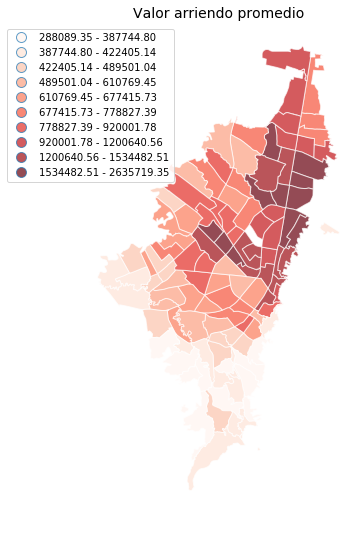

In [176]:
base = vlr_arr.plot( figsize=(9,9),column='arriendo_real',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("Valor arriendo promedio", fontsize = 14)
plt.axis("off")

Text(0.5,1,'distribucion valor arriendo por upz')

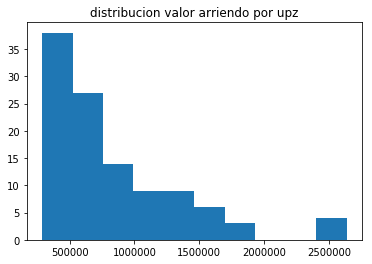

In [177]:
plt.hist(vlr_arr.arriendo_real, bins=10);
plt.title("distribucion valor arriendo por upz")

In [178]:
vlr_arr.arriendo_real.describe()

count    1.100000e+02
mean     8.363920e+05
std      5.147710e+05
min      2.880893e+05
25%      4.490922e+05
50%      6.774157e+05
75%      1.046382e+06
max      2.635719e+06
Name: arriendo_real, dtype: float64

Text(0.5,1,'distribucion porcentaje hogares en arriendo por upz')

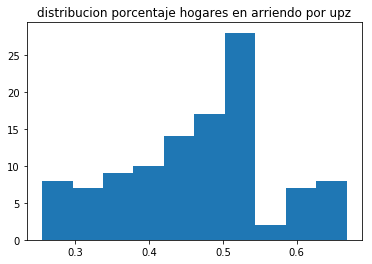

In [179]:
plt.hist(prop.proporcion_arrend);
plt.title("distribucion porcentaje hogares en arriendo por upz")

# Miremos ahora motos carros y bicis

In [180]:
print (motos.shape)
print (carros.shape)
print (bicis.shape)

(73662, 11)
(73662, 11)
(73662, 11)


In [181]:
print (type(motos.cuantas_motos.iloc[0]))
print (type(carros.cuantos_carros.iloc[0]))
print (type(bicis.cuantas_bicis.iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>


In [182]:
motos.cuantas_motos.replace(' ',0, inplace=True)
carros.cuantos_carros.replace(' ',0, inplace=True)
bicis.cuantas_bicis.replace(' ',0, inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [183]:
motos["cuantas_motos"] = motos.cuantas_motos.astype(int)
carros["cuantos_carros"] = carros.cuantos_carros.astype(int)
bicis["cuantas_bicis"] = bicis.cuantas_bicis.astype(int)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [184]:
motos_upz = motos.groupby(motos["NUMERO"]).mean().reset_index()
carros_upz = carros.groupby(carros["NUMERO"]).mean().reset_index()
bicis_upz = bicis.groupby(bicis["NUMERO"]).mean().reset_index()

In [185]:
motitos = pd.merge(motos_upz, upz, left_on="NUMERO", right_on="NUMERO")
carritos = pd.merge(carros_upz, upz, left_on="NUMERO", right_on="NUMERO")
biciss = pd.merge(bicis_upz, upz, left_on="NUMERO", right_on="NUMERO")

In [186]:
motitos = gp.GeoDataFrame(motitos)
carritos = gp.GeoDataFrame(carritos)
biciss = gp.GeoDataFrame(biciss)

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

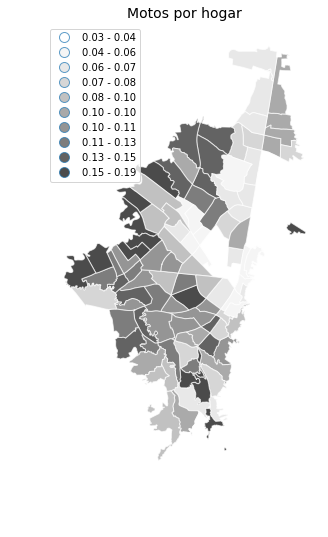

In [187]:
base = motitos.plot( figsize=(9,9),column='cuantas_motos',cmap='Greys',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("Motos por hogar", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

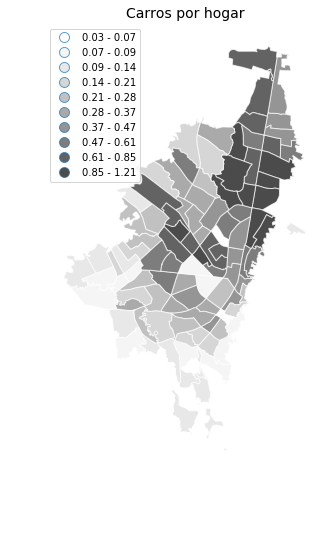

In [188]:
base = carritos.plot( figsize=(9,9),column='cuantos_carros',cmap='Greys',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("Carros por hogar", fontsize = 14)
plt.axis("off")

In [189]:
biciss.shape

(110, 19)

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

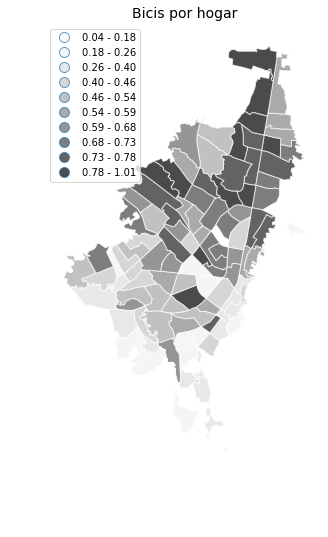

In [190]:
base = biciss.plot( figsize=(9,9),column='cuantas_bicis',cmap='Greys',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("Bicis por hogar", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

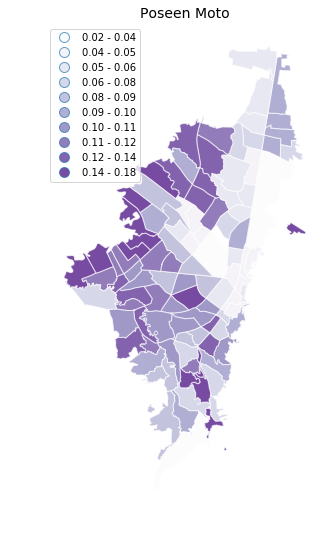

In [191]:
base = motitos.plot( figsize=(9,9),column='poseen_moto',cmap='Purples',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("Poseen Moto", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

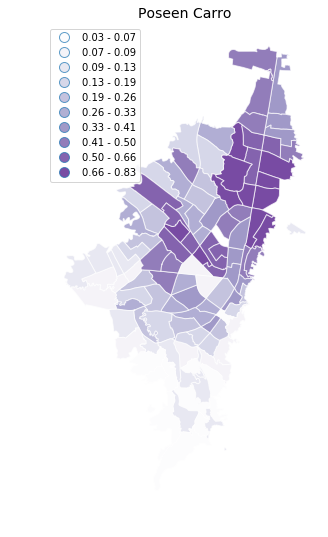

In [192]:
base = carritos.plot( figsize=(9,9),column='poseen_carro',cmap='Purples',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("Poseen Carro", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

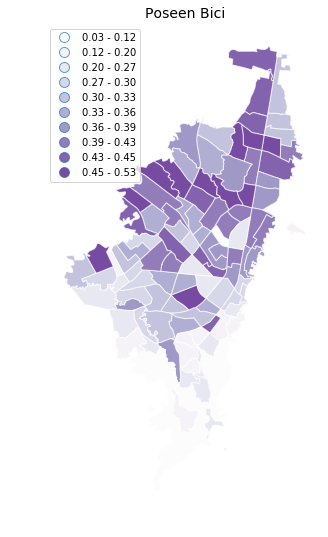

In [193]:
base = biciss.plot( figsize=(9,9),column='poseen_bici',cmap='Purples',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("Poseen Bici", fontsize = 14)
plt.axis("off")

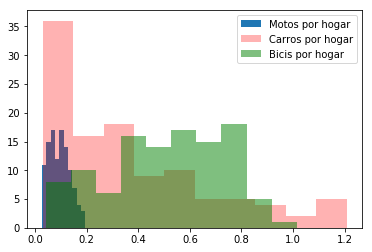

In [194]:
plt.hist(motitos.cuantas_motos, alpha = 1, label = "Motos por hogar");
plt.hist(carritos.cuantos_carros, alpha = 0.3, label = "Carros por hogar", color = "r");
plt.hist(biciss.cuantas_bicis, alpha = 0.5, label = "Bicis por hogar", color = "green");

plt.legend()

In [195]:
print ("Numero de motos en Bogota",motos.cuantas_motos.mean() * motos.FEX_C.sum())
print ("Numero de carros en Bogota",carros.cuantos_carros.mean() * carros.FEX_C.sum())
print ("Numero de bicis en Bogota",bicis.cuantas_bicis.mean() * bicis.FEX_C.sum())

Numero de motos en Bogota 265834.8357109269
Numero de carros en Bogota 930421.9249882442
Numero de bicis en Bogota 1376190.8559987277


In [196]:
carritos["proporcion_hogares_con_carros_motos"] = carritos["poseen_carro"] / motitos["poseen_moto"]
carritos["proporcion_hogares_con_bicis_motos"] = biciss["poseen_bici"] / motitos["poseen_moto"]
carritos["proporcion_hogares_con_carros_bicis"] = carritos["poseen_carro"] / biciss["poseen_bici"]

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

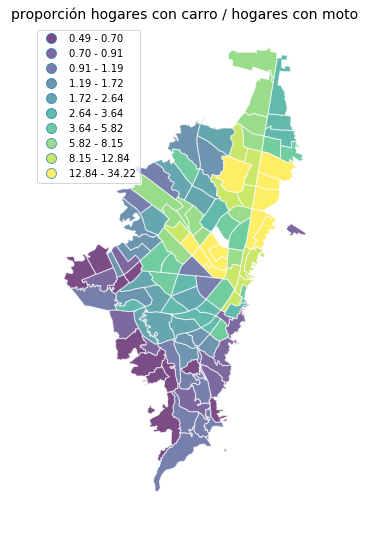

In [197]:
base = carritos.plot( figsize=(9,9),column='proporcion_hogares_con_carros_motos',cmap='viridis',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("proporción hogares con carro / hogares con moto", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

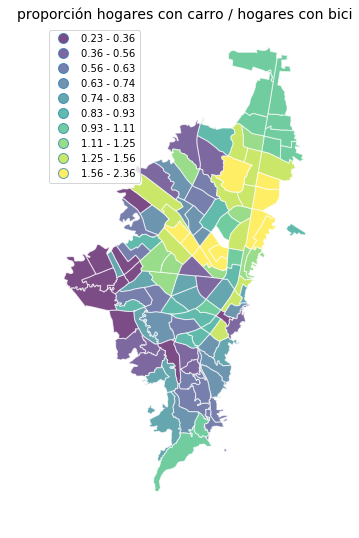

In [198]:
base = carritos.plot( figsize=(9,9),column='proporcion_hogares_con_carros_bicis',cmap='viridis',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("proporción hogares con carro / hogares con bici", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

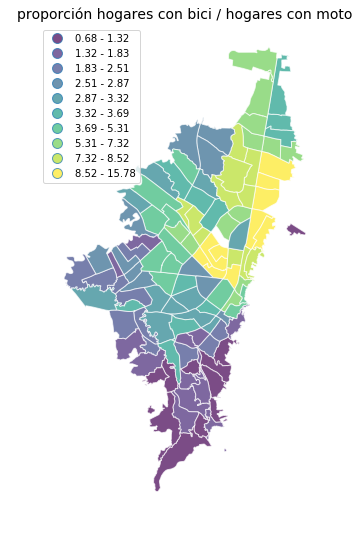

In [199]:
base = carritos.plot( figsize=(9,9),column='proporcion_hogares_con_bicis_motos',cmap='viridis',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("proporción hogares con bici / hogares con moto", fontsize = 14)
plt.axis("off")

# Veamos los planes para adquirir vivienda

In [200]:
adquirir_vivienda.shape

(73662, 10)

In [201]:
adquirir_vivienda.head(2)

DIRECTORIO LOCALIDAD      FEX_C NUMERO  TIPO_UPZ_x LOCALIDAD_x  \
0    101000.0      SUBA  16.604442     23         4.0        SUBA   
1    101020.0      SUBA  19.107988     23         4.0        SUBA   

        ESTRATOS_x  HECTARES  \
0  ESTRATOS VARIOS   419.919   
1  ESTRATOS VARIOS   419.919   

                                            geometry  \
0  POLYGON ((101301.968398328 118170.407855043, 1...   
1  POLYGON ((101301.968398328 118170.407855043, 1...   

   planes_adquisicion_vivienda  
0                            2  
1                            1

In [202]:
adquirir_vivienda["planes_adquisicion_vivienda"] = adquirir_vivienda.planes_adquisicion_vivienda.replace(2,0)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
type(adquirir_vivienda["planes_adquisicion_vivienda"].iloc[1])

numpy.int64

In [204]:
adquirir_vivienda_upz = adquirir_vivienda.groupby(adquirir_vivienda["NUMERO"]).mean().reset_index()

In [205]:
ad_viv = pd.merge(adquirir_vivienda_upz, upz, left_on="NUMERO", right_on="NUMERO")

In [206]:
ad_viv = gp.GeoDataFrame(ad_viv)

(82602.5195, 108707.0705, 80071.47333701015, 128118.95992278683)

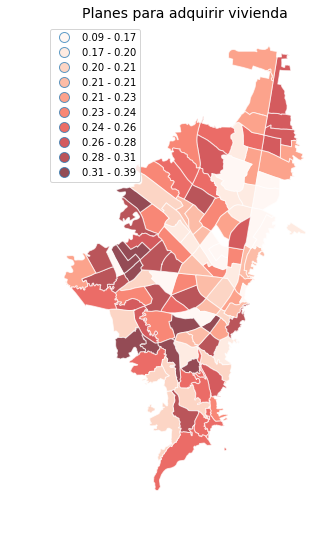

In [207]:
base = ad_viv.plot( figsize=(9,9),column='planes_adquisicion_vivienda',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

#renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.8, 0.15, 0.2))

plt.title("Planes para adquirir vivienda", fontsize = 14)
plt.axis("off")

Text(0.5,1,'Proporcion hogares en arriendo vs Planes para adquirir vivienda')

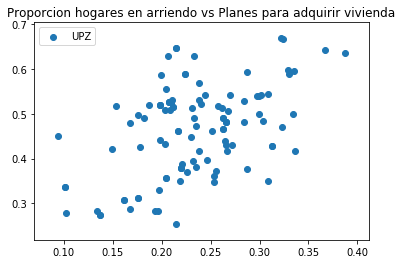

In [208]:
pl.scatter(ad_viv.planes_adquisicion_vivienda, prop.proporcion_arrend, label = "UPZ")
pl.legend(loc = 2)
pl.title("Proporcion hogares en arriendo vs Planes para adquirir vivienda")

In [209]:
Y = ad_viv.planes_adquisicion_vivienda
X = prop.proporcion_arrend

alt_dens = pd.concat([Y, X], axis = 1, join = "outer")

In [210]:
lm=smf.ols('Y~X',data=alt_dens).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     31.35
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           1.66e-07
Time:                        11:11:54   Log-Likelihood:                 172.17
No. Observations:                 110   AIC:                            -340.3
Df Residuals:                     108   BIC:                            -334.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1066      0.023      4.588      0.000       0.061       0.153
X              0.2736      0.049      5.599      0.000       0.177       0.371
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.936
Skew:                           0.012   Prob(JB):                        0.626
Kurtosis:                       2.549   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
alt_dens.columns

Index(['planes_adquisicion_vivienda', 'proporcion_arrend'], dtype='object')

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,33,'% Hogares que piensan comprar vivienda ')

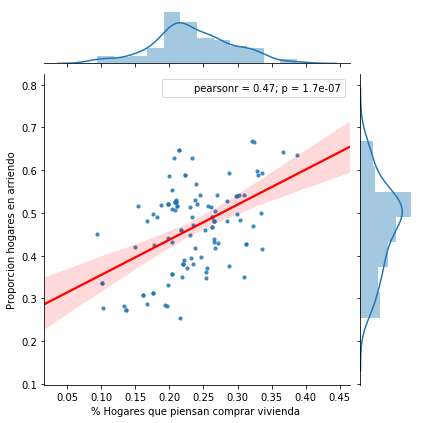

In [212]:
a = sn.jointplot("planes_adquisicion_vivienda", "proporcion_arrend", data=alt_dens, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}}, scatter_kws={"s": 10})
pl.ylabel("Proporcion hogares en arriendo")
pl.xlabel("% Hogares que piensan comprar vivienda ")

# Finalmente para finalizar en análisis del capítulo C vamos a hacer el análisis de tiempo a utilities

In [213]:
tiempo_caminando.head()

DIRECTORIO LOCALIDAD      FEX_C NUMERO  TIPO_UPZ_x LOCALIDAD_x  \
0    101000.0      SUBA  16.604442     23         4.0        SUBA   
1    101020.0      SUBA  19.107988     23         4.0        SUBA   
2    101022.0      SUBA  20.413564     23         4.0        SUBA   
3    101023.0      SUBA  21.122395     23         4.0        SUBA   
4    101024.0      SUBA  16.604442     23         4.0        SUBA   

        ESTRATOS_x  HECTARES  \
0  ESTRATOS VARIOS   419.919   
1  ESTRATOS VARIOS   419.919   
2  ESTRATOS VARIOS   419.919   
3  ESTRATOS VARIOS   419.919   
4  ESTRATOS VARIOS   419.919   

                                            geometry  \
0  POLYGON ((101301.968398328 118170.407855043, 1...   
1  POLYGON ((101301.968398328 118170.407855043, 1...   
2  POLYGON ((101301.968398328 118170.407855043, 1...   
3  POLYGON ((101301.968398328 118170.407855043, 1...   
4  POLYGON ((101301.968398328 118170.407855043, 1...   

  tiempo_caminando_transmilenio_alimentador tiempo_caminando_SITP  \
0                                        15                     2   
1                                        25                     5   
2                                        40                     3   
3                                        35                     5   
4                                        20                     5   

   tiempo_caminando_paradero  tiempo_caminando_intermunicipal  \
0                         15                               60   
1                          5                               30   
2                          3                                2   
3                          5                               60   
4                          5                                5   

   tiempo_caminando_parque  tiempo_caminando_tienda_supermercado  \
0                       10                                     1   
1                       10                                     5   
2                        1                                     3   
3                        2                                     4   
4                        5                                     5   

   tiempo_caminando_farmacia  tiempo_caminando_banco  \
0                          2                      20   
1                          5                      15   
2                          2                       2   
3                          5                       5   
4                          5                       5   

   tiempo_caminando_CAI_estacion_policia  tiempo_caminando_biblioteca  \
0                                     30                           20   
1                                     15                           60   
2                                     10                           30   
3                                     20                           30   
4                                     15                           15   

   tiempo_caminando_cultura_recreacion  tiempo_caminando_cicloruta  \
0                                   30                          10   
1                                   30                           5   
2                                   10                           3   
3                                   30                           5   
4                                    5                           5   

   tiempo_caminando_medico  
0                       30  
1                       60  
2                        2  
3                        5  
4                        5

In [214]:
tiempo_caminando.tiempo_caminando_transmilenio_alimentador = tiempo_caminando.tiempo_caminando_transmilenio_alimentador.astype(float)

tiempo_caminando.tiempo_caminando_SITP = tiempo_caminando.tiempo_caminando_SITP.astype(float)



C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [215]:
type(tiempo_caminando.tiempo_caminando_banco.iloc[2])

numpy.int64

In [216]:
tiempo_caminando_upz = tiempo_caminando.groupby(tiempo_caminando["NUMERO"]).mean().reset_index()


In [217]:
tiempo_caminando_upz.head()

NUMERO     DIRECTORIO      FEX_C  TIPO_UPZ_x  HECTARES  \
0    100  210233.799574  11.629257         2.0   237.921   
1    101  179101.155810   8.313515         2.0   237.542   
2    102  218745.473928  22.861455         6.0   453.781   
3    107  202721.601415   9.959262         3.0   175.252   
4    109  200769.626829  22.667550         3.0   180.480   

   tiempo_caminando_transmilenio_alimentador  tiempo_caminando_SITP  \
0                                   7.752665               5.000000   
1                                   8.154049               4.676937   
2                                   7.698725               7.425261   
3                                   8.198113               5.841981   
4                                  12.493902               8.069512   

   tiempo_caminando_paradero  tiempo_caminando_intermunicipal  \
0                   6.396588                        45.357143   
1                   4.804577                        56.847711   
2                   7.634994                        38.388181   
3                   5.925708                        32.475236   
4                   7.856098                        21.442683   

   tiempo_caminando_parque  tiempo_caminando_tienda_supermercado  \
0                 8.713220                              4.598081   
1                 6.405810                              4.892606   
2                10.405562                              6.100811   
3                 7.081368                              5.871462   
4                 5.887805                              7.964634   

   tiempo_caminando_farmacia  tiempo_caminando_banco  \
0                   4.828358                7.907249   
1                   5.095070                7.892606   
2                   6.444959               15.395133   
3                   5.353774                9.251179   
4                   7.908537                9.491463   

   tiempo_caminando_CAI_estacion_policia  tiempo_caminando_biblioteca  \
0                              11.603412                    30.364606   
1                              10.221831                    25.902289   
2                              12.977984                    31.946698   
3                              33.739387                    22.231132   
4                              35.276829                    36.528049   

   tiempo_caminando_cultura_recreacion  tiempo_caminando_cicloruta  \
0                            21.140725                    7.785714   
1                            15.866197                    5.385563   
2                            27.244496                   11.514484   
3                            16.509434                    6.892689   
4                            27.564634                   10.585366   

   tiempo_caminando_medico  
0                19.782516  
1                16.528169  
2                18.380070  
3                21.181604  
4                15.406098

In [218]:
tiempo_caminando.columns

Index(['DIRECTORIO', 'LOCALIDAD', 'FEX_C', 'NUMERO', 'TIPO_UPZ_x',
       'LOCALIDAD_x', 'ESTRATOS_x', 'HECTARES', 'geometry',
       'tiempo_caminando_transmilenio_alimentador', 'tiempo_caminando_SITP',
       'tiempo_caminando_paradero', 'tiempo_caminando_intermunicipal',
       'tiempo_caminando_parque', 'tiempo_caminando_tienda_supermercado',
       'tiempo_caminando_farmacia', 'tiempo_caminando_banco',
       'tiempo_caminando_CAI_estacion_policia', 'tiempo_caminando_biblioteca',
       'tiempo_caminando_cultura_recreacion', 'tiempo_caminando_cicloruta',
       'tiempo_caminando_medico'],
      dtype='object')

In [219]:
tiempo_caminando_upz.columns

Index(['NUMERO', 'DIRECTORIO', 'FEX_C', 'TIPO_UPZ_x', 'HECTARES',
       'tiempo_caminando_transmilenio_alimentador', 'tiempo_caminando_SITP',
       'tiempo_caminando_paradero', 'tiempo_caminando_intermunicipal',
       'tiempo_caminando_parque', 'tiempo_caminando_tienda_supermercado',
       'tiempo_caminando_farmacia', 'tiempo_caminando_banco',
       'tiempo_caminando_CAI_estacion_policia', 'tiempo_caminando_biblioteca',
       'tiempo_caminando_cultura_recreacion', 'tiempo_caminando_cicloruta',
       'tiempo_caminando_medico'],
      dtype='object')

In [220]:
walking_time = pd.merge(tiempo_caminando_upz, upz, left_on="NUMERO", right_on="NUMERO")

In [221]:
walking_time = gp.GeoDataFrame(walking_time)

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

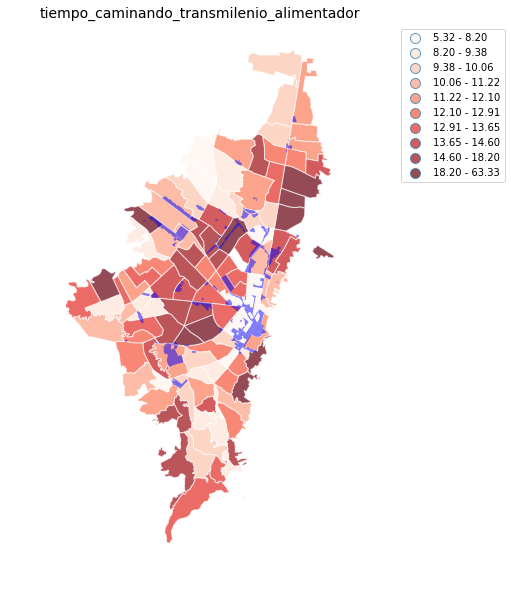

In [222]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_transmilenio_alimentador',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_transmilenio_alimentador", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

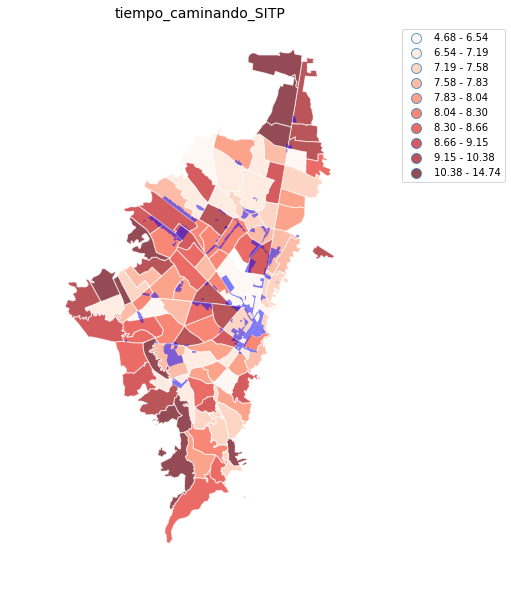

In [223]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_SITP',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_SITP", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

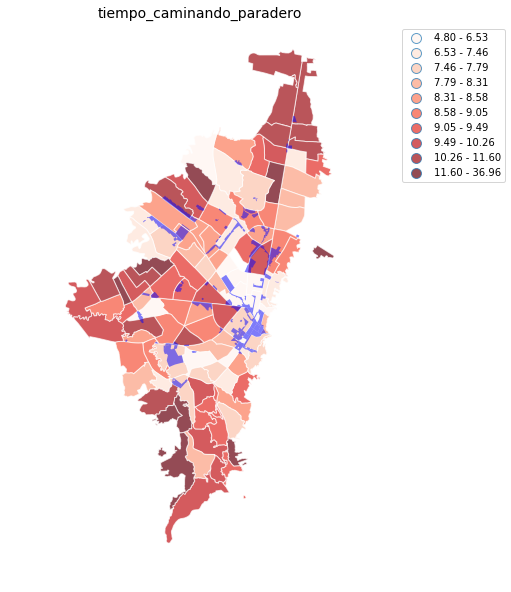

In [224]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_paradero',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_paradero", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

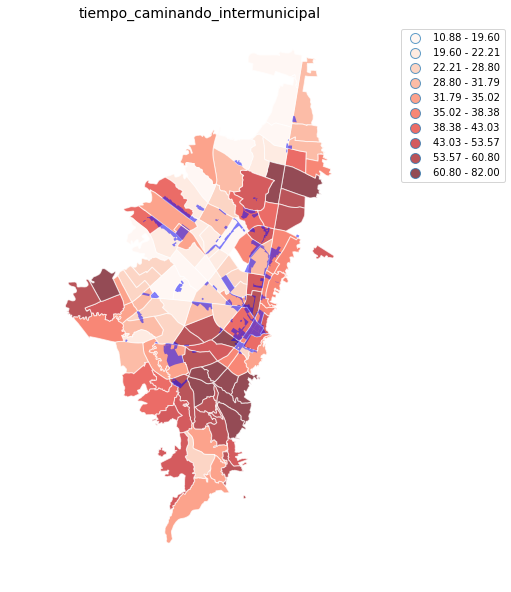

In [225]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_intermunicipal',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_intermunicipal", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

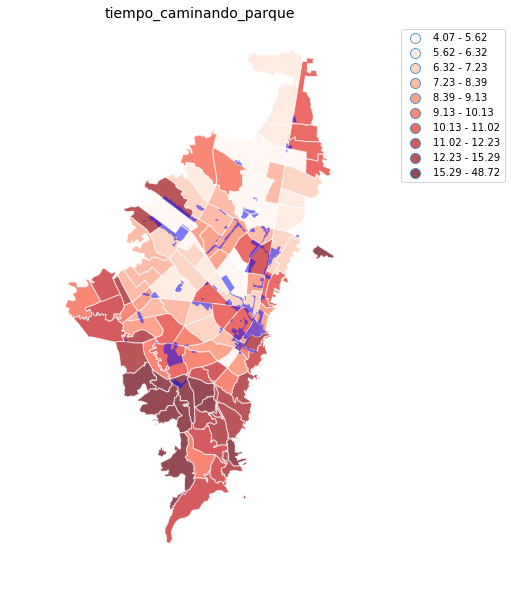

In [226]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_parque',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_parque", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

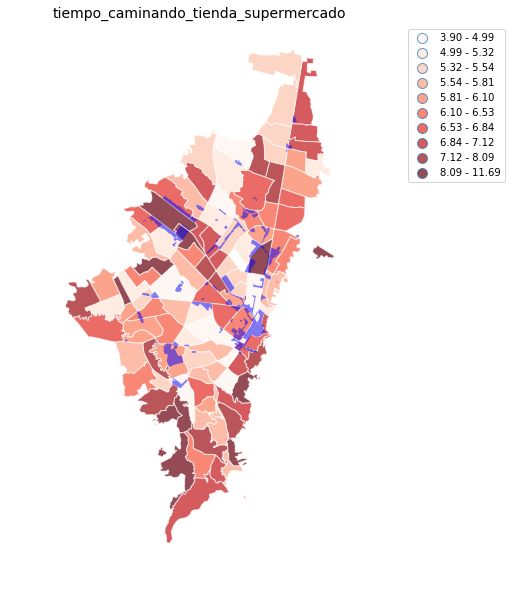

In [227]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_tienda_supermercado',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_tienda_supermercado", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

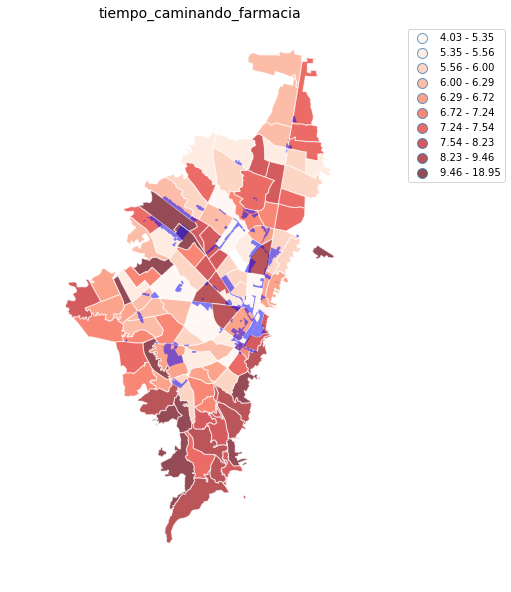

In [228]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_farmacia',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_farmacia", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

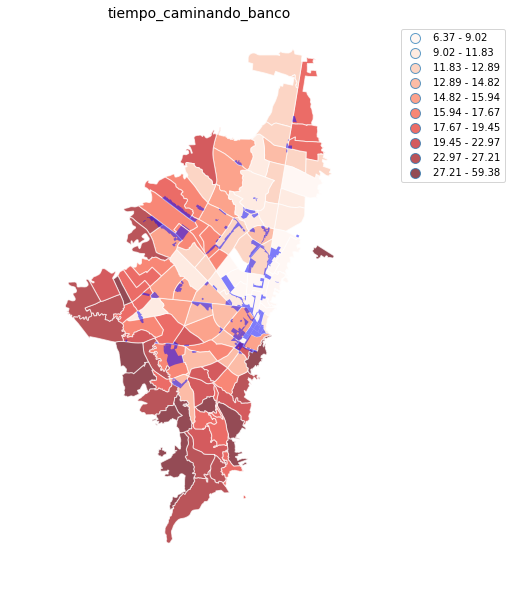

In [229]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_banco',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_banco", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

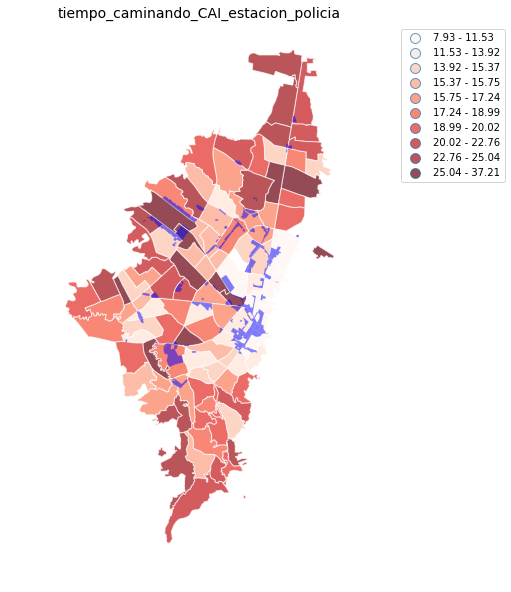

In [230]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_CAI_estacion_policia',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_CAI_estacion_policia", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

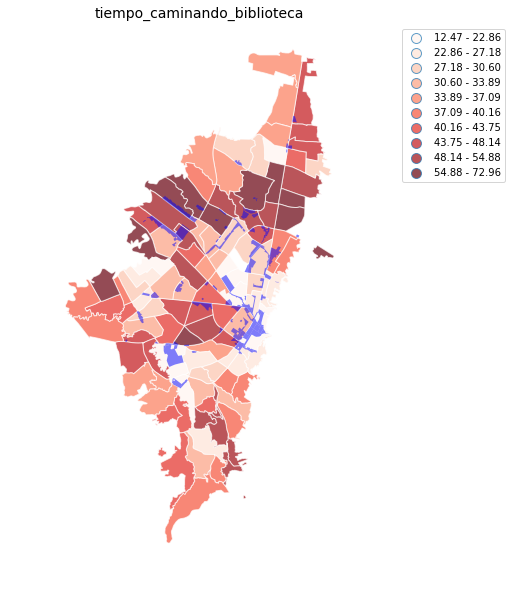

In [231]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_biblioteca',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_biblioteca", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

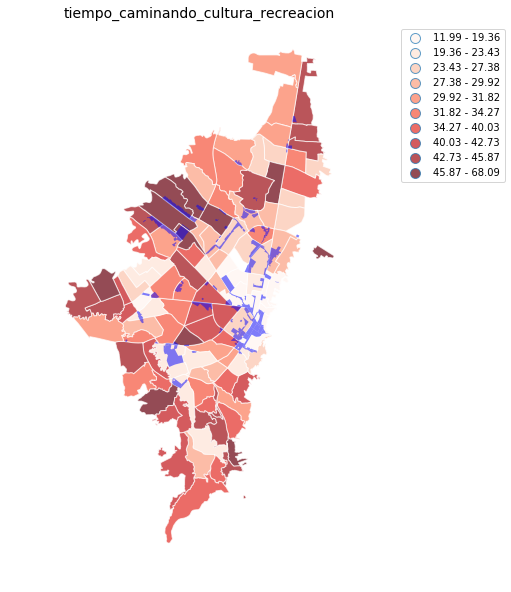

In [232]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_cultura_recreacion',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_cultura_recreacion", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

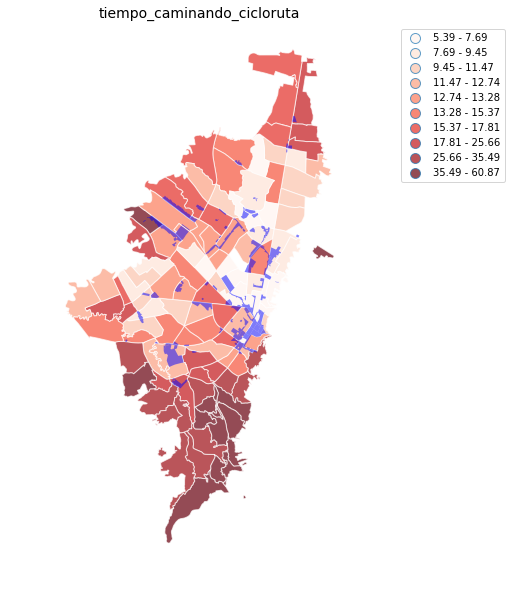

In [233]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_cicloruta',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_cicloruta", fontsize = 14)
plt.axis("off")

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

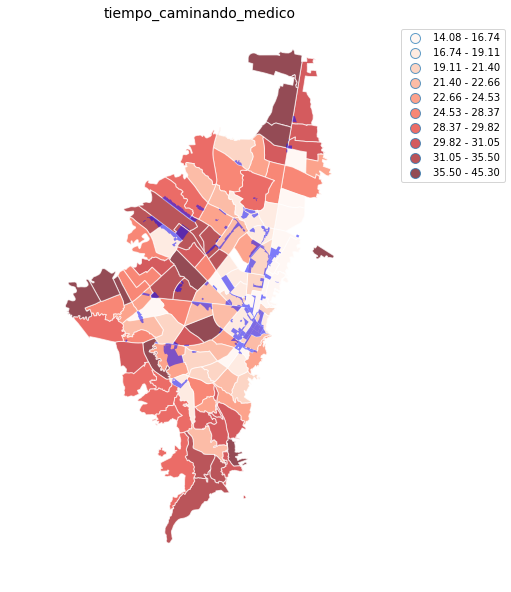

In [234]:
base = walking_time.plot( figsize=(10,10),column='tiempo_caminando_medico',cmap='Reds',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("tiempo_caminando_medico", fontsize = 14)
plt.axis("off")

In [235]:
personas_componen_hogar.head()

DIRECTORIO LOCALIDAD      FEX_C NUMERO  TIPO_UPZ_x LOCALIDAD_x  \
0    101000.0      SUBA  16.604442     23         4.0        SUBA   
1    101020.0      SUBA  19.107988     23         4.0        SUBA   
2    101022.0      SUBA  20.413564     23         4.0        SUBA   
3    101023.0      SUBA  21.122395     23         4.0        SUBA   
4    101024.0      SUBA  16.604442     23         4.0        SUBA   

        ESTRATOS_x  HECTARES  \
0  ESTRATOS VARIOS   419.919   
1  ESTRATOS VARIOS   419.919   
2  ESTRATOS VARIOS   419.919   
3  ESTRATOS VARIOS   419.919   
4  ESTRATOS VARIOS   419.919   

                                            geometry  personas_en_hogar  
0  POLYGON ((101301.968398328 118170.407855043, 1...                  3  
1  POLYGON ((101301.968398328 118170.407855043, 1...                  5  
2  POLYGON ((101301.968398328 118170.407855043, 1...                  3  
3  POLYGON ((101301.968398328 118170.407855043, 1...                  3  
4  POLYGON ((101301.968398328 118170.407855043, 1...                  3

In [236]:
type(personas_componen_hogar.personas_en_hogar.iloc[1])

numpy.int64

In [237]:
personas_componen_hogar_upz = personas_componen_hogar.groupby(personas_componen_hogar["NUMERO"]).mean().reset_index()

In [238]:
personas_por_hogar = pd.merge(personas_componen_hogar_upz, upz, left_on="NUMERO", right_on="NUMERO")

In [239]:
personas_por_hogar = gp.GeoDataFrame(personas_por_hogar)

(82602.5195, 108707.0705, 80071.47333701013, 128118.95992278685)

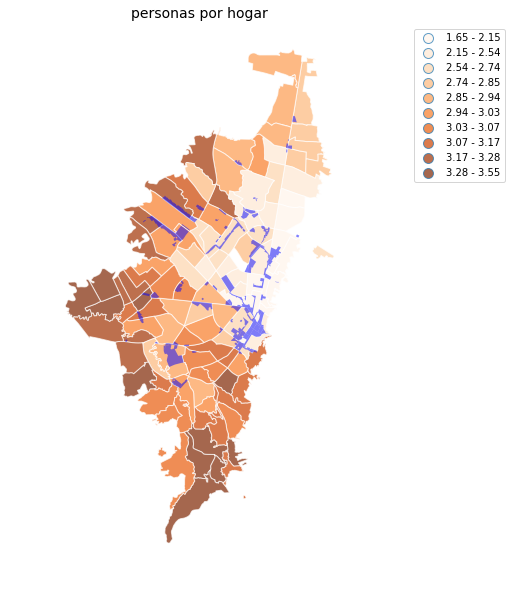

In [240]:
base = personas_por_hogar.plot( figsize=(10,10),column='personas_en_hogar',cmap='Oranges',edgecolor='white',legend=True, scheme = "quantiles", k = 10, alpha = 0.7)

renov.plot(ax = base,legend=True, color = "b", lw = 0.5, alpha=0.5)
#renov_pot.plot(ax = base,legend=True, color = "b", lw = 0.5)

leg = base.get_legend()
leg.set_bbox_to_anchor((1.4, 0.8, 0.15, 0.2))

plt.title("personas por hogar", fontsize = 14)
plt.axis("off")

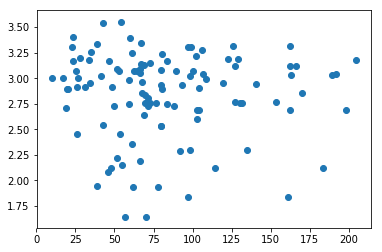

In [241]:
pl.scatter(pob.densidad, personas_por_hogar.personas_en_hogar)

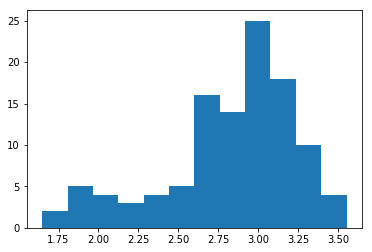

In [244]:
pl.hist(personas_por_hogar.personas_en_hogar, bins=12);

In [245]:
import scipy

In [246]:
scipy.stats.percentileofscore(personas_por_hogar.personas_en_hogar, 3)

58.18181818181818